<h1 align="center"> CSE 242 Assignment 5, Fall 2022

<h2 align="center"> 2 Questions, 100 pts, due: 23:59 pm, Dec 5th, 2022
    
    Your name: Nistha Kumar         Student ID: 2005437

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Coding)
- **Task 2:** Neural Networks (Coding + Theory)



# Question 1. (EM algorithm, 30 pts)

#### **Question 1.1.** Implement EM Algorithm in Python from scratch.


In [1]:
from scipy.stats import multivariate_normal 
import numpy as np

def e_step(data, mu, sigma, pi, k):

  ########################
  #### YOUR CODE HERE ####
  ########################

  # HINTS: ##
  ## distribution = multivariate_normal() from scipy can be used to find distribution given mu and sigma for each gaussian
  ## likelihood = distribution.pdf() can be then used to find likelihood for each datapoint (likelihood of each data point belonging to kth cluster)

  ## you will find z_ik here (let's call it as "weights")
  likelihood = np.zeros((data.shape[0],k))
  for i in range(k):
    dis=multivariate_normal(mean=mu[i],cov=sigma[i])
    likelihood[:,i] = dis.pdf(data)
  
  prob = likelihood * pi
  z = prob.sum(axis=1)[:,np.newaxis]
  weights = prob/z

  return weights

def m_step(data, mu, sigma, pi, weights, k):

  ##################################################
  #### YOUR CODE HERE ##############################
  # HERE YOU WILL UPDATE VALUES OF mu, sigma and pi
  ##################################################

  ## numpy.cov() can be used to find sigma, i.e., covariance matrix 
  for i in range(k):
    weight = weights[:, [i]]
    t_weight=weight.sum()
    mu[i] = (data * weight).sum(axis=0)/t_weight
    sigma[i]= np.cov(data.T,aweights=(weight/t_weight).flatten(),bias=True)

  return mu, sigma, pi      # updated mu, sigma, pi


def gmm(data, mu, sigma, pi, k, max_iterations=1000):    

    for _ in range(max_iterations):

        # update cluter assignment weights
        weights = e_step(data, mu, sigma, pi, k)    # WRITE CODE FOR E-Step
        
        # update mu, sigma and prior proabilities locations
        mu, sigma, pi = m_step(data, mu, sigma, pi, weights, k)  # WRITE CODE FOR M-Step
        
    # final assignment update
    weights = e_step(data, mu, sigma, pi, k)
    assignments = np.argmax(weights, axis=1)      # pick cluster with maximum probability weight as cluster assignment for each datapoint

    return mu, sigma, pi, assignments

## Reference: https://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/

#### **Question 1.2.** Run your code on following toy dataset we provided in the Assignment 4. Run for different k-values, where k = {3, 4} and 

1. visualize 2-D gaussian ellipses with $\mu \in \mathbb{R}^2$ and $\Sigma \in \mathbb{R}^{2\times 2}$ you obtained.
2. plot the cluster assignments for different k's (as done in assignment 4) for both GMM and K-Means side by side for comparison. There will total 4 plots, 2 plots for each 'k' value.
3. Write your observations (open question)

In [2]:
import numpy as np
from scipy.spatial.distance import cdist
def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####
  row, col = data.shape
  assignments = np.empty([row])
  distances = cdist(data, centroids)
  assignments=np.argmin(distances,axis=1)


  ## you will get cluster# 
  ##assignments here #####
  ########################

  return assignments

def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  ########################
  K = centroids.shape[0]
  centroids=np.empty(centroids.shape)
  for i in range(K):
    centroids[i]=np.mean(data[assignments ==i], axis=0)

  return centroids


def kmeans(data, centroids, max_iterations):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments

[[-1.50824765e+00  2.52510964e+00]
 [-2.28628272e+00  7.46823809e+00]
 [-4.68814302e-01  2.10725384e+00]
 ...
 [ 2.12055668e+00  4.17134782e-04]
 [-1.12993421e+00  2.38265914e+00]
 [ 3.08948529e+00  1.32547340e+00]]
[2 3 2 ... 1 2 1]


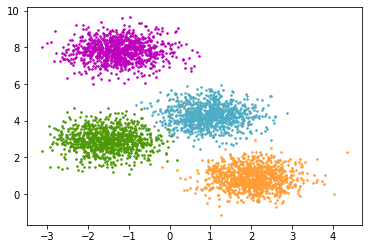

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
print(X)
print(y_true)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


Plotting for k : 3


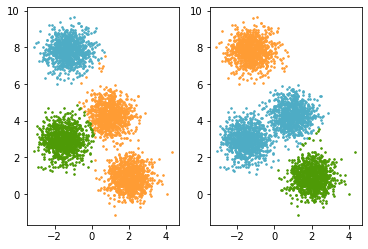

Plotting for k : 4


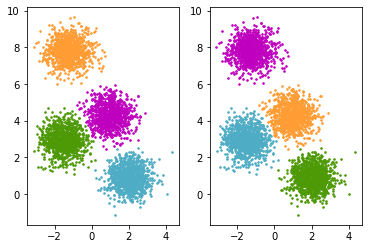

In [4]:

import numpy as np

# function to get initial cluster parameters (mu, sigma and pi)
def get_initial_parameters(k, X):

  # initial weights given to each cluster
  pi = np.full(shape=k, fill_value=1/k) 

  # dataset is divided randomly into k parts of unequal sizes
  random_row = np.random.randint(low=0, high=X.shape[0], size=k)

  # initial value of mean of k Gaussians
  mu = [  X[row_index,:] for row_index in random_row ] 

  # initial value of covariance matrix of k Gaussians
  sigma = [ np.cov(X.T) for _ in range(k) ] 
  
  return pi, mu, sigma


## Main code
for k in [3, 4]:

  f, (plt1, plt2) = plt.subplots(1, 2) 

  pi_initial, mu_initial, sigma_initial = get_initial_parameters(k, X)

  #### GMM #####

  mu_final, sigma_final, pi_final, gmm_cluster_assignments = gmm(X, mu_initial, sigma_initial, pi_initial, k)

  for j, col in enumerate(colors):
      cluster_data = gmm_cluster_assignments == j
      plt1.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
  #plt.show()


  #############################################################
  #### KMEANS #####
  #### Use your implementation of KMEANS from assignment 4 ####
  #############################################################

  # kmeans_cluster_assignments = your_kmeans_implementation()

  def get_initial_clusters(k, X):
    random_indices = np.random.randint(0, X.shape[0], k)
    initial_centroids = X[random_indices]

    return initial_centroids

# your code here.
#clusters=[3,4]
#colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
#fig, axs = plt.subplots(len(clusters), figsize=[8,30])
#for idx, i in enumerate(clusters):
  centroids=get_initial_clusters(k, X)
  centroids,assignments=kmeans(X,centroids,100)
    #print(assignments.shape)
  for j,col in enumerate(colors):
      cluster_data = assignments == j
      plt2.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
        #axs[idx].scatter(X[cluster_data, 0], X[cluster_data, 1], color=colors[k], s=10, )
  print("Plotting for k : "+str(k))
  plt.show()

  # for k, col in enumerate(colors):
  #     cluster_data = kmeans_cluster_assignments == k
  #     plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
  # plt.show()

  #############################################################################
  #### Observations on Comparison of GMM vs KMEANS ############################
  #############################################################################




# Question 2. Neural Networks (70 pts)


Consider the following neural network:

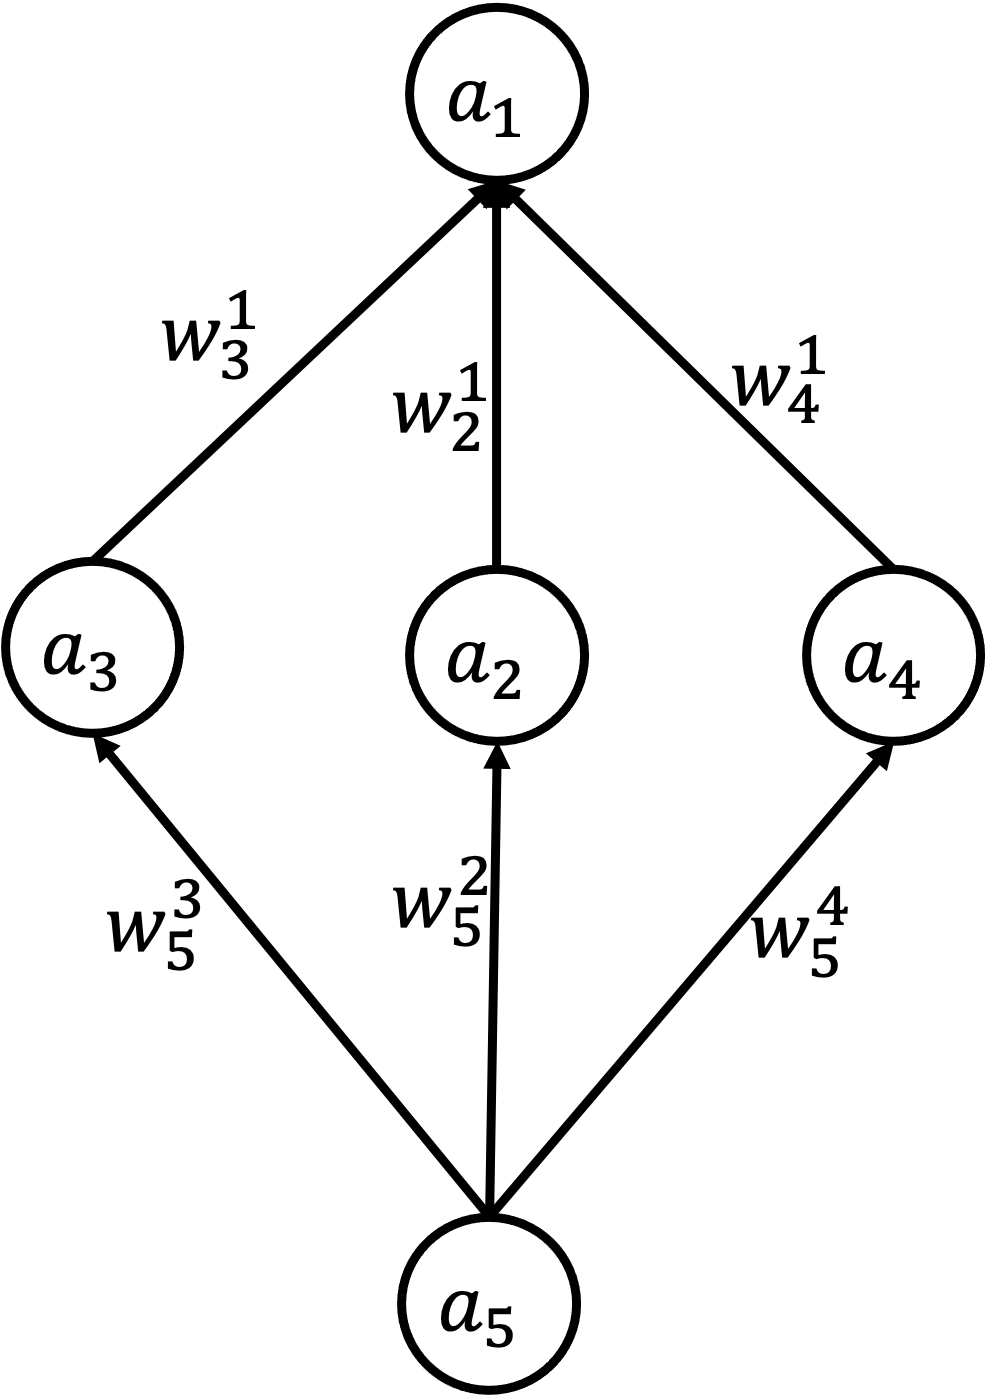

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')
from IPython.display import Image
a = Image(filename='New_NN.png')
display(a)

#Image(filename='/content/drive/My Drive/CSE242/Assignment5/New_NN.png', width=400) 

where $a_i = \Sigma_j w_j^i z_j$ , $z_i = f_i(a_i)$ for $i= 1, 2,3,4, z_5 = a_5$ (an input neuron), and $f_1(x) = f_2(x) = f_3(x) = f_4(x) = $ sigmoid$(x)$.


### **Question 2.1**. Write a function to simulate the neural network (20 pts) ###


**Answer:**


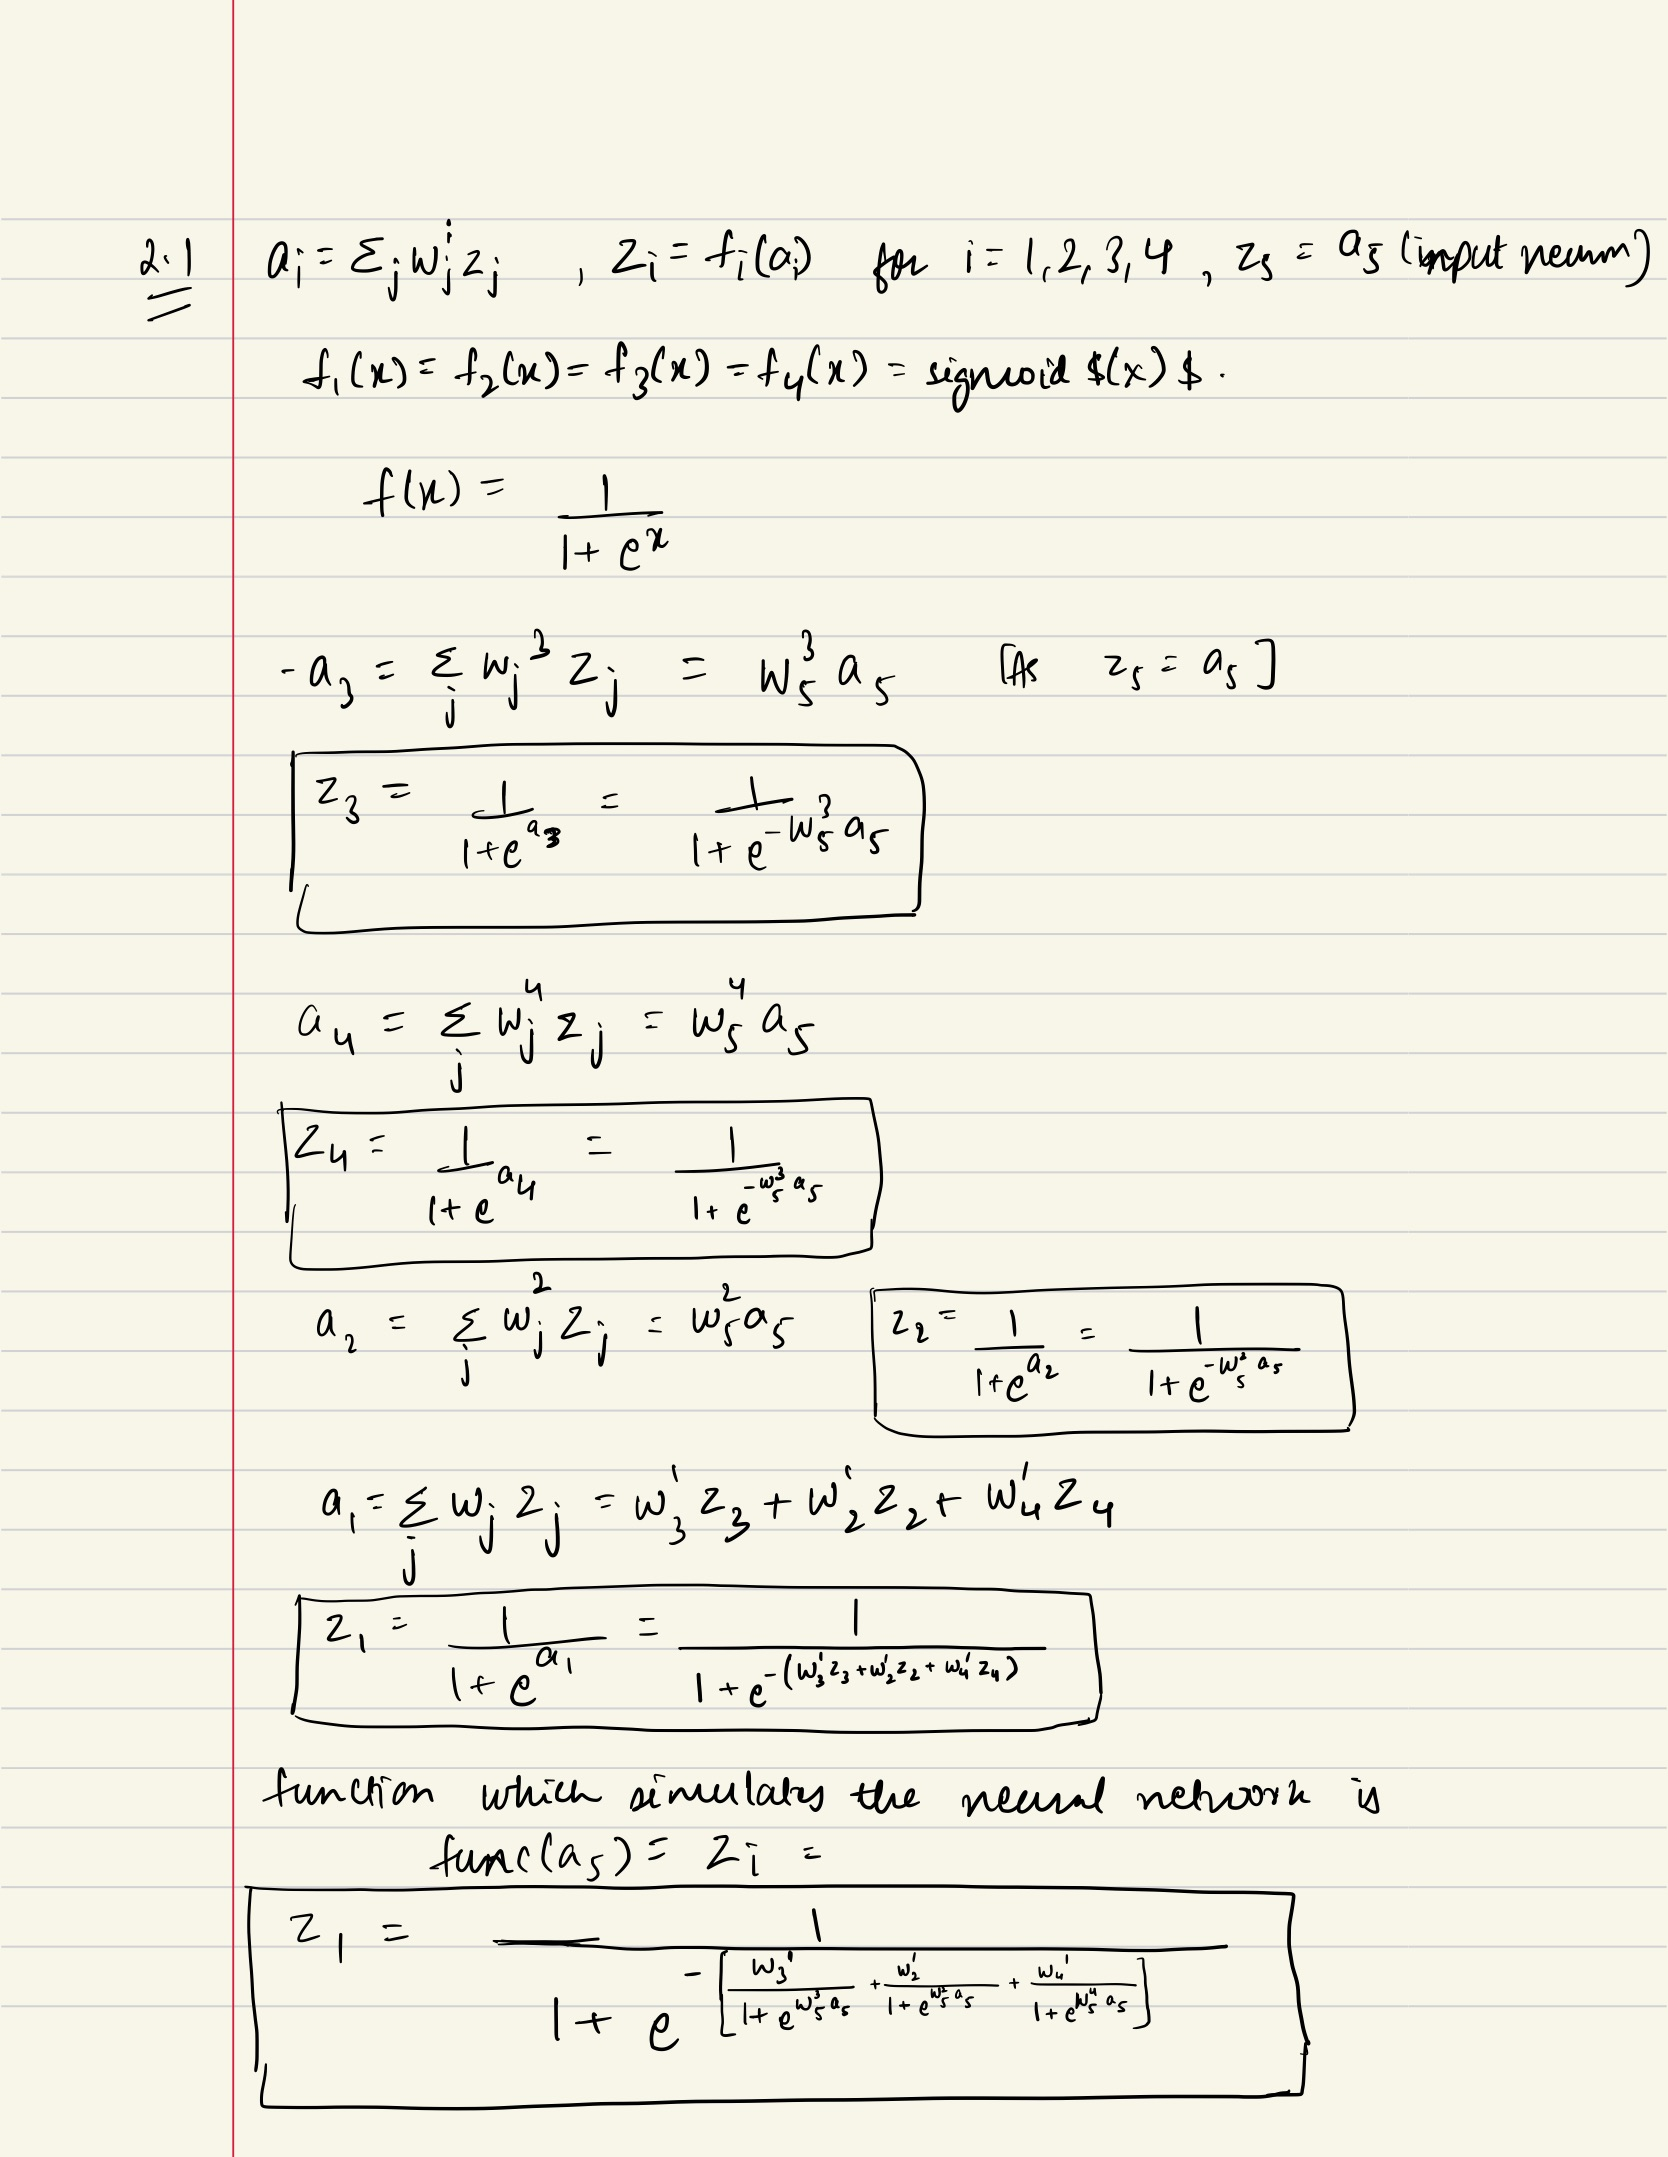

In [6]:
Image(filename='2.1.jpg') 

### **Question 2.2** Deduce the equation to calculate $δ_i$ (the error value per neuron) for all the neurons. (20 pts) ###
Write a function that given a training sample and the weights of the network calculate $δ_i$ for each neuron.

**Hint:**
########################################

#### **SIGMOID** ####
$$f(x) = \dfrac{1}{1+e^{-x}} $$
$$df(x)/dx = f(x)(1-f(x))$$

########################################
#### **LOSS FUNCTION** ####
$$error = 0.5*(z_1 - target)^2$$
########################################

#### **DERIVATES** ####
$\partial{error}/\partial{w^1_3} = \partial error/\partial z_1* \partial z_1/\partial a_1 * \partial a_1/\partial w^1_3$ (using chain rule)

$δ_5 =  \partial error/\partial w^3_5 + \partial error/\partial w^2_5 + \partial error/\partial w^4_5$ (total error from connected neurons)


**Answer:**

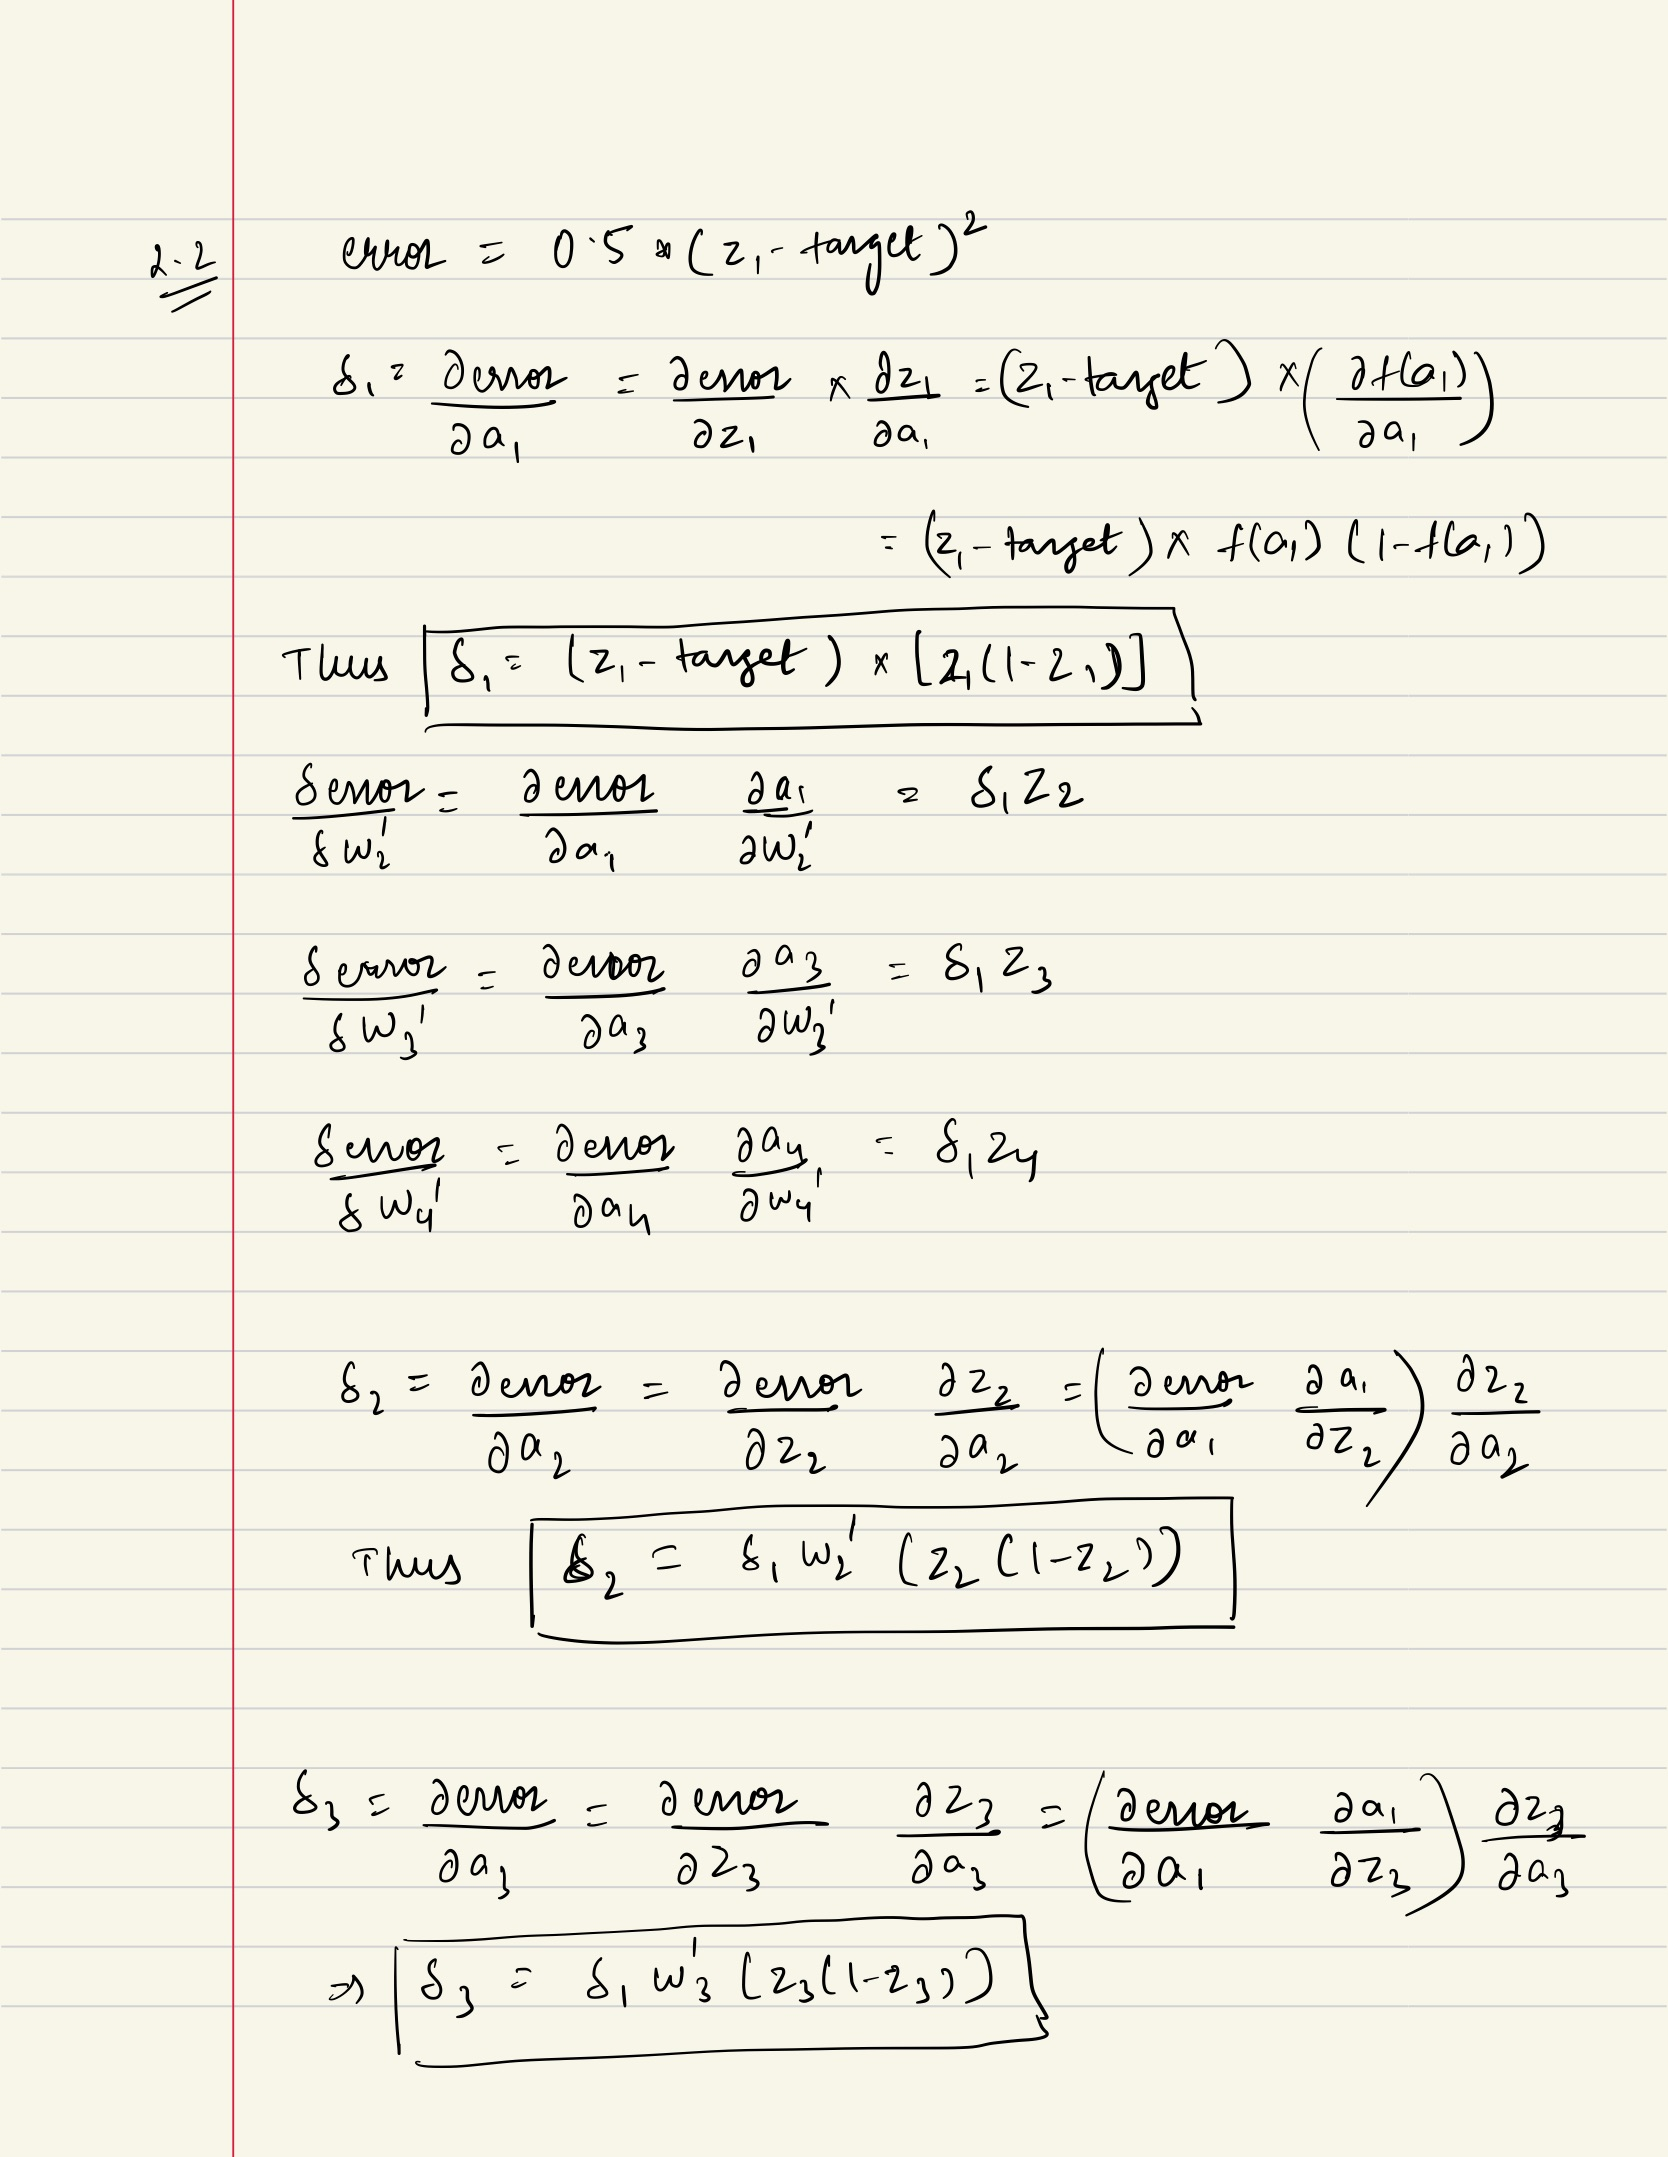

In [7]:
Image(filename='2.2_1.jpg') 


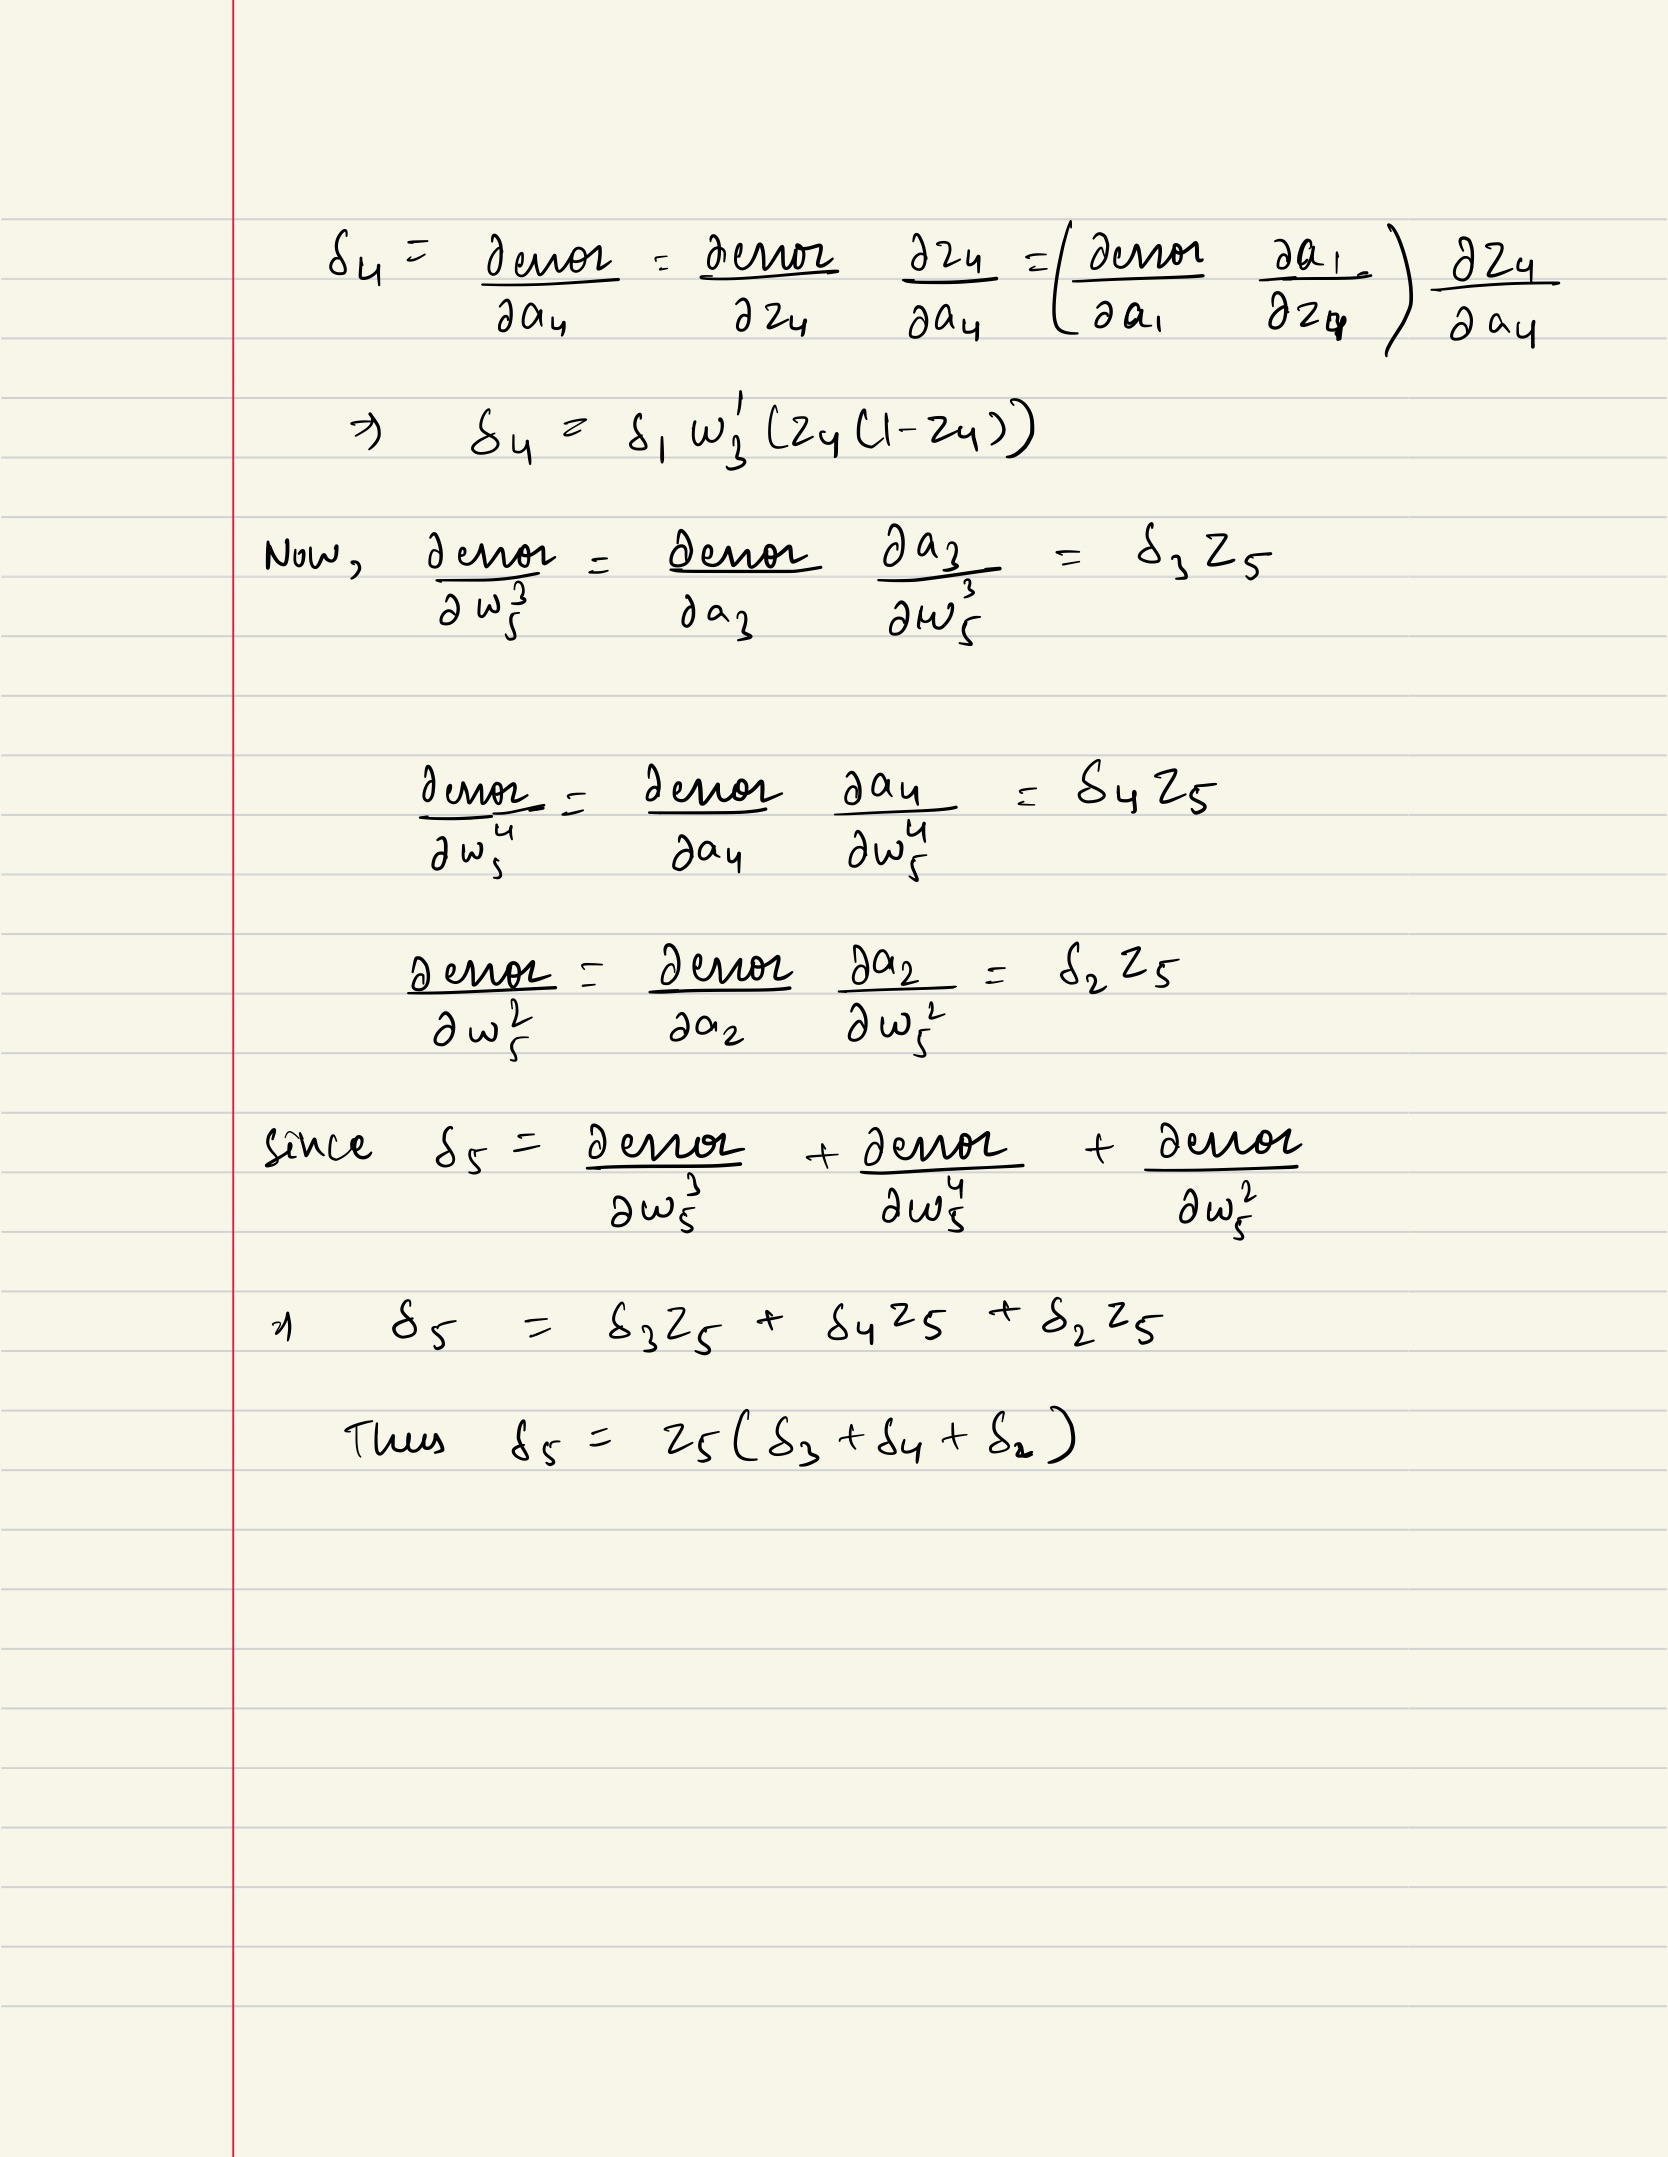

In [8]:
Image(filename='2.2_2.jpg') 

### **Question 2.3** (15 pts) ###

Assuming that the weight matrix is:

  \begin{array}{c|cccc}
    & 1 & 2 & 3 & 4 \\
    \hline
    2 & 3 &  &  &  \\
    3 & -4 &  &  \\
    4 & -1 &  &  &  \\
    5 & & -3 & 2 & -10
  \end{array}


use the functions from items (a) and (b) to calculate the output of each neuron, $z_i$, and the error, $δ_i$, for the following training samples:

\begin{array}{ c c }
 x & y  \\ 
 0.0 & 0.5  \\  
 1.0 & 0.1     
\end{array}


**Answer:**



\begin{array}{ c c c c c c c c c c c c}
 x & y & a_1 & a_2  & a_3 & a_4 & a_5 & z_1 & z_2 & z_3 & z_4 & z_5 \\ 
 0.0 & 0.5 &  \\  
 1.0 & 0.1 & 
\end{array}



\begin{array}{ c c c c c c c}
 x & y & δ_1 & δ_2  & δ_3 & δ_4 & δ_5 \\ 
 0.0 & 0.5 &  \\   
 1.0 & 0.1 & 
\end{array}



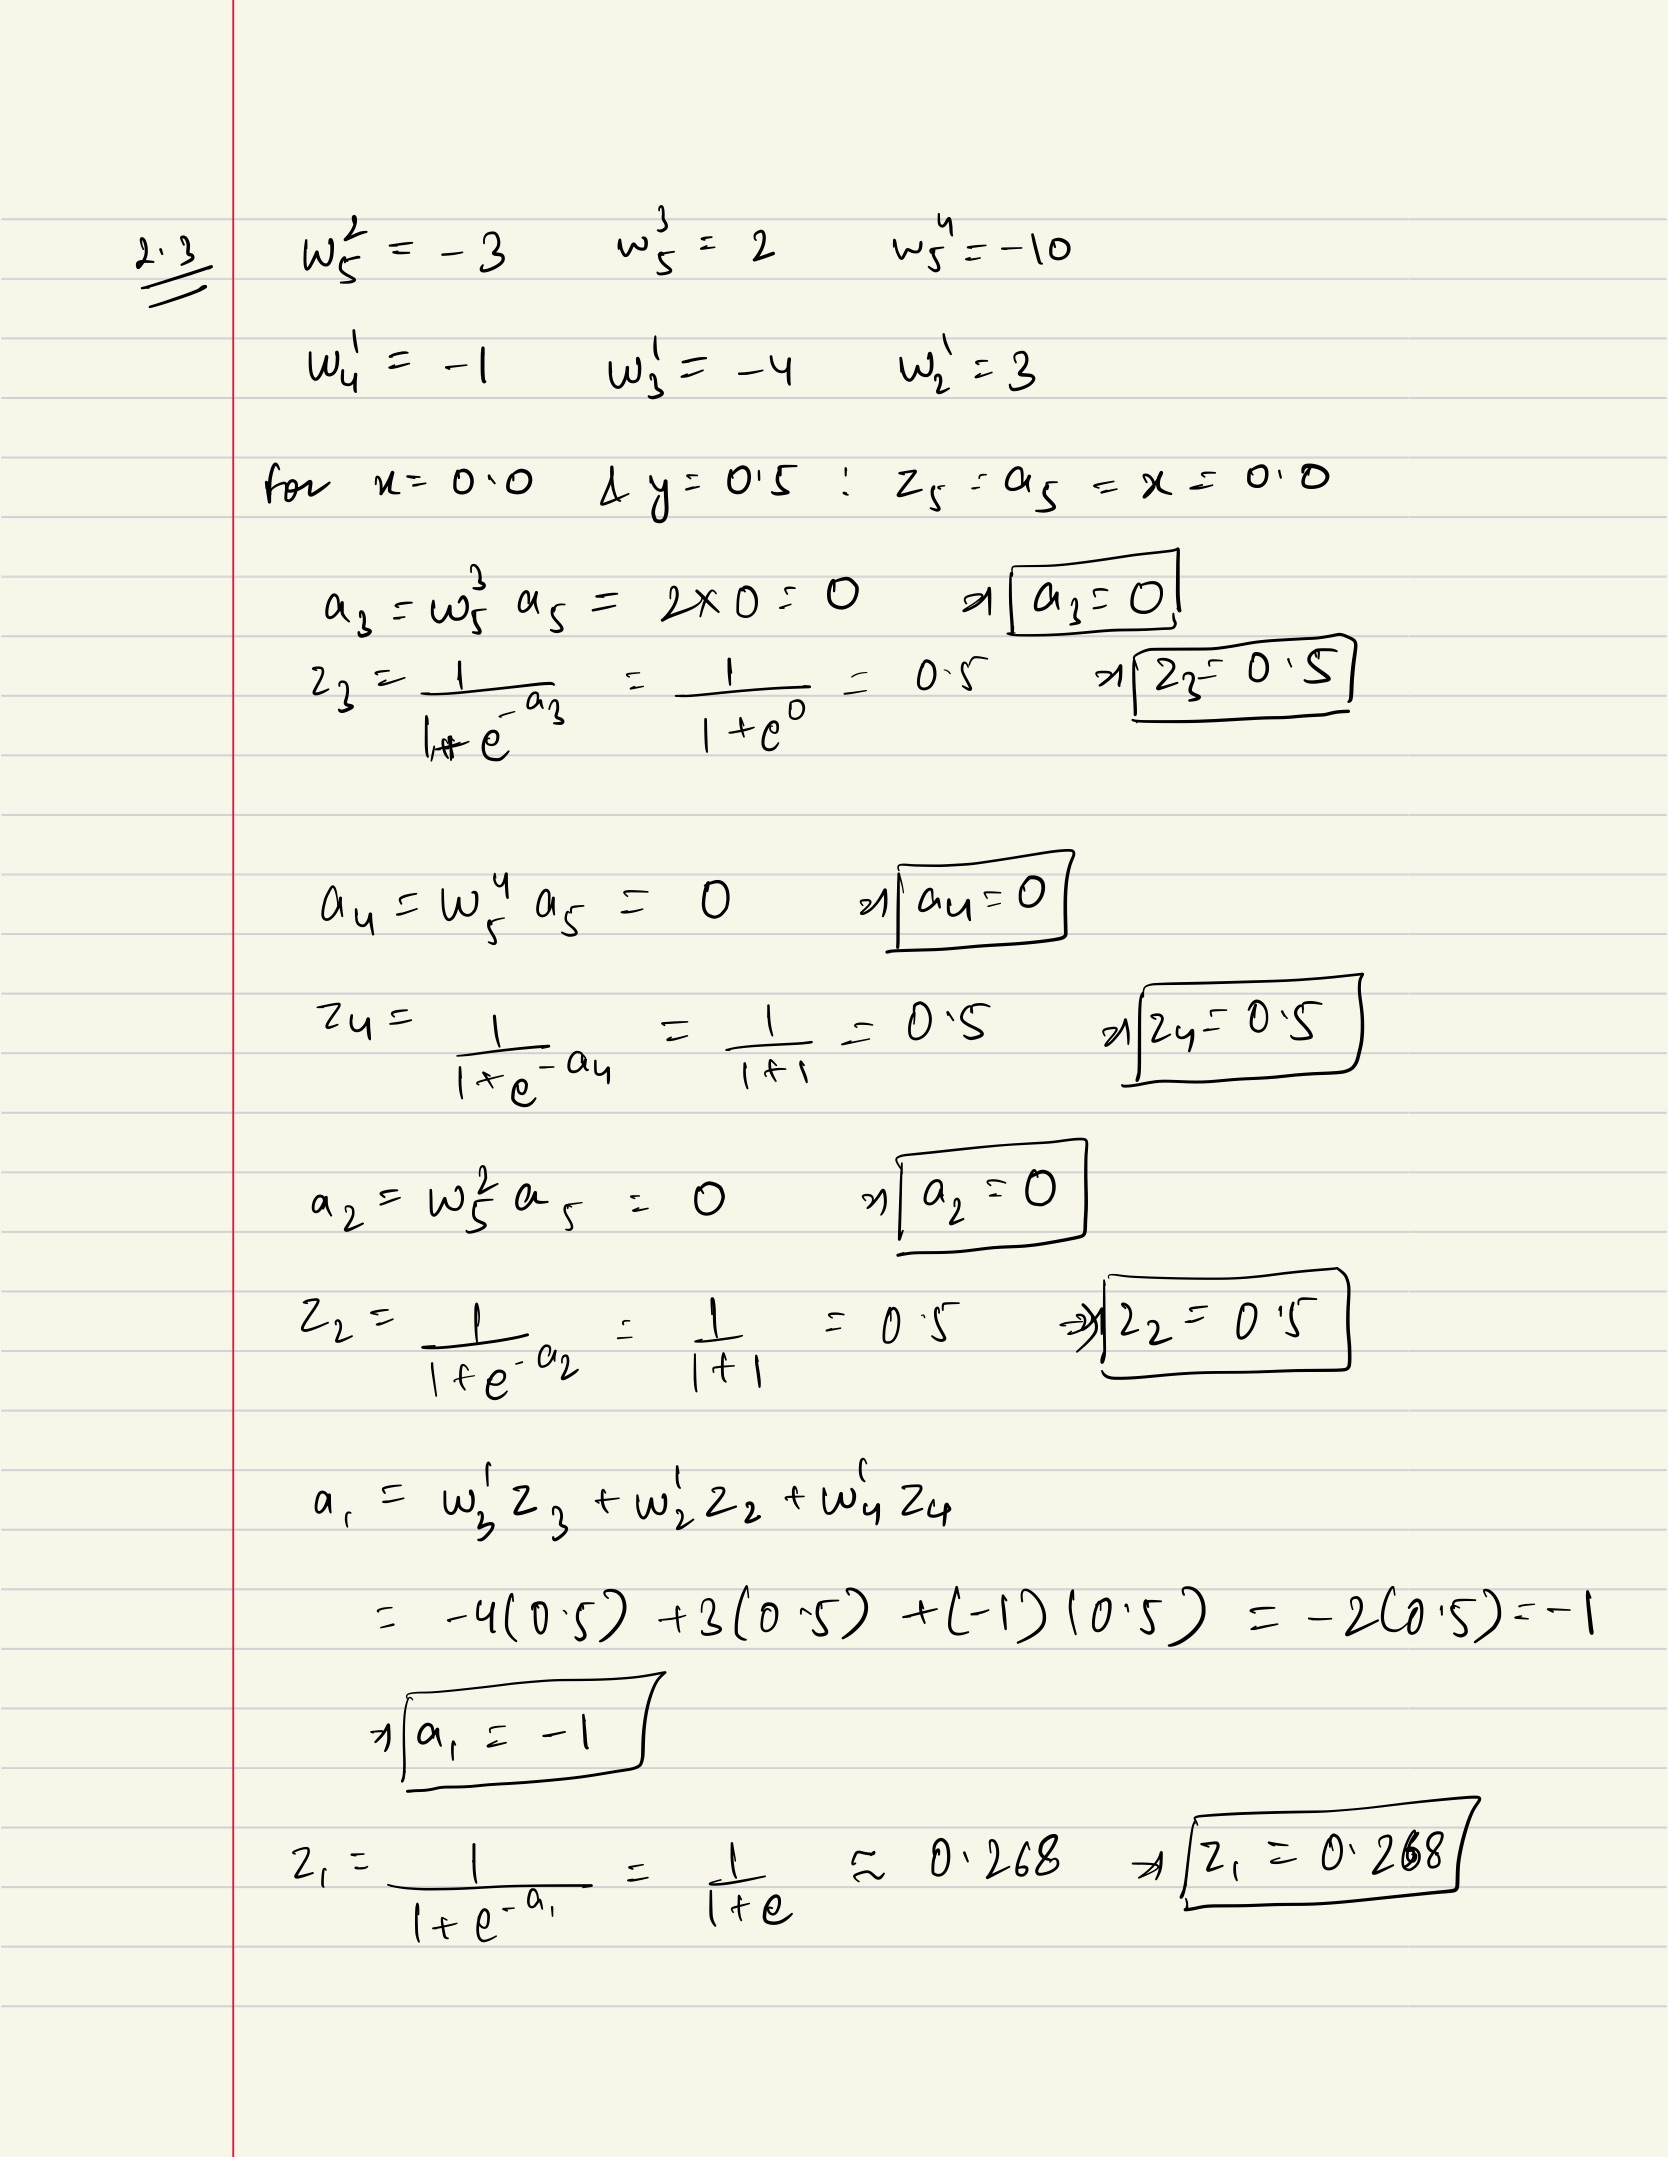

In [9]:
Image(filename='2.3_1.jpg') 

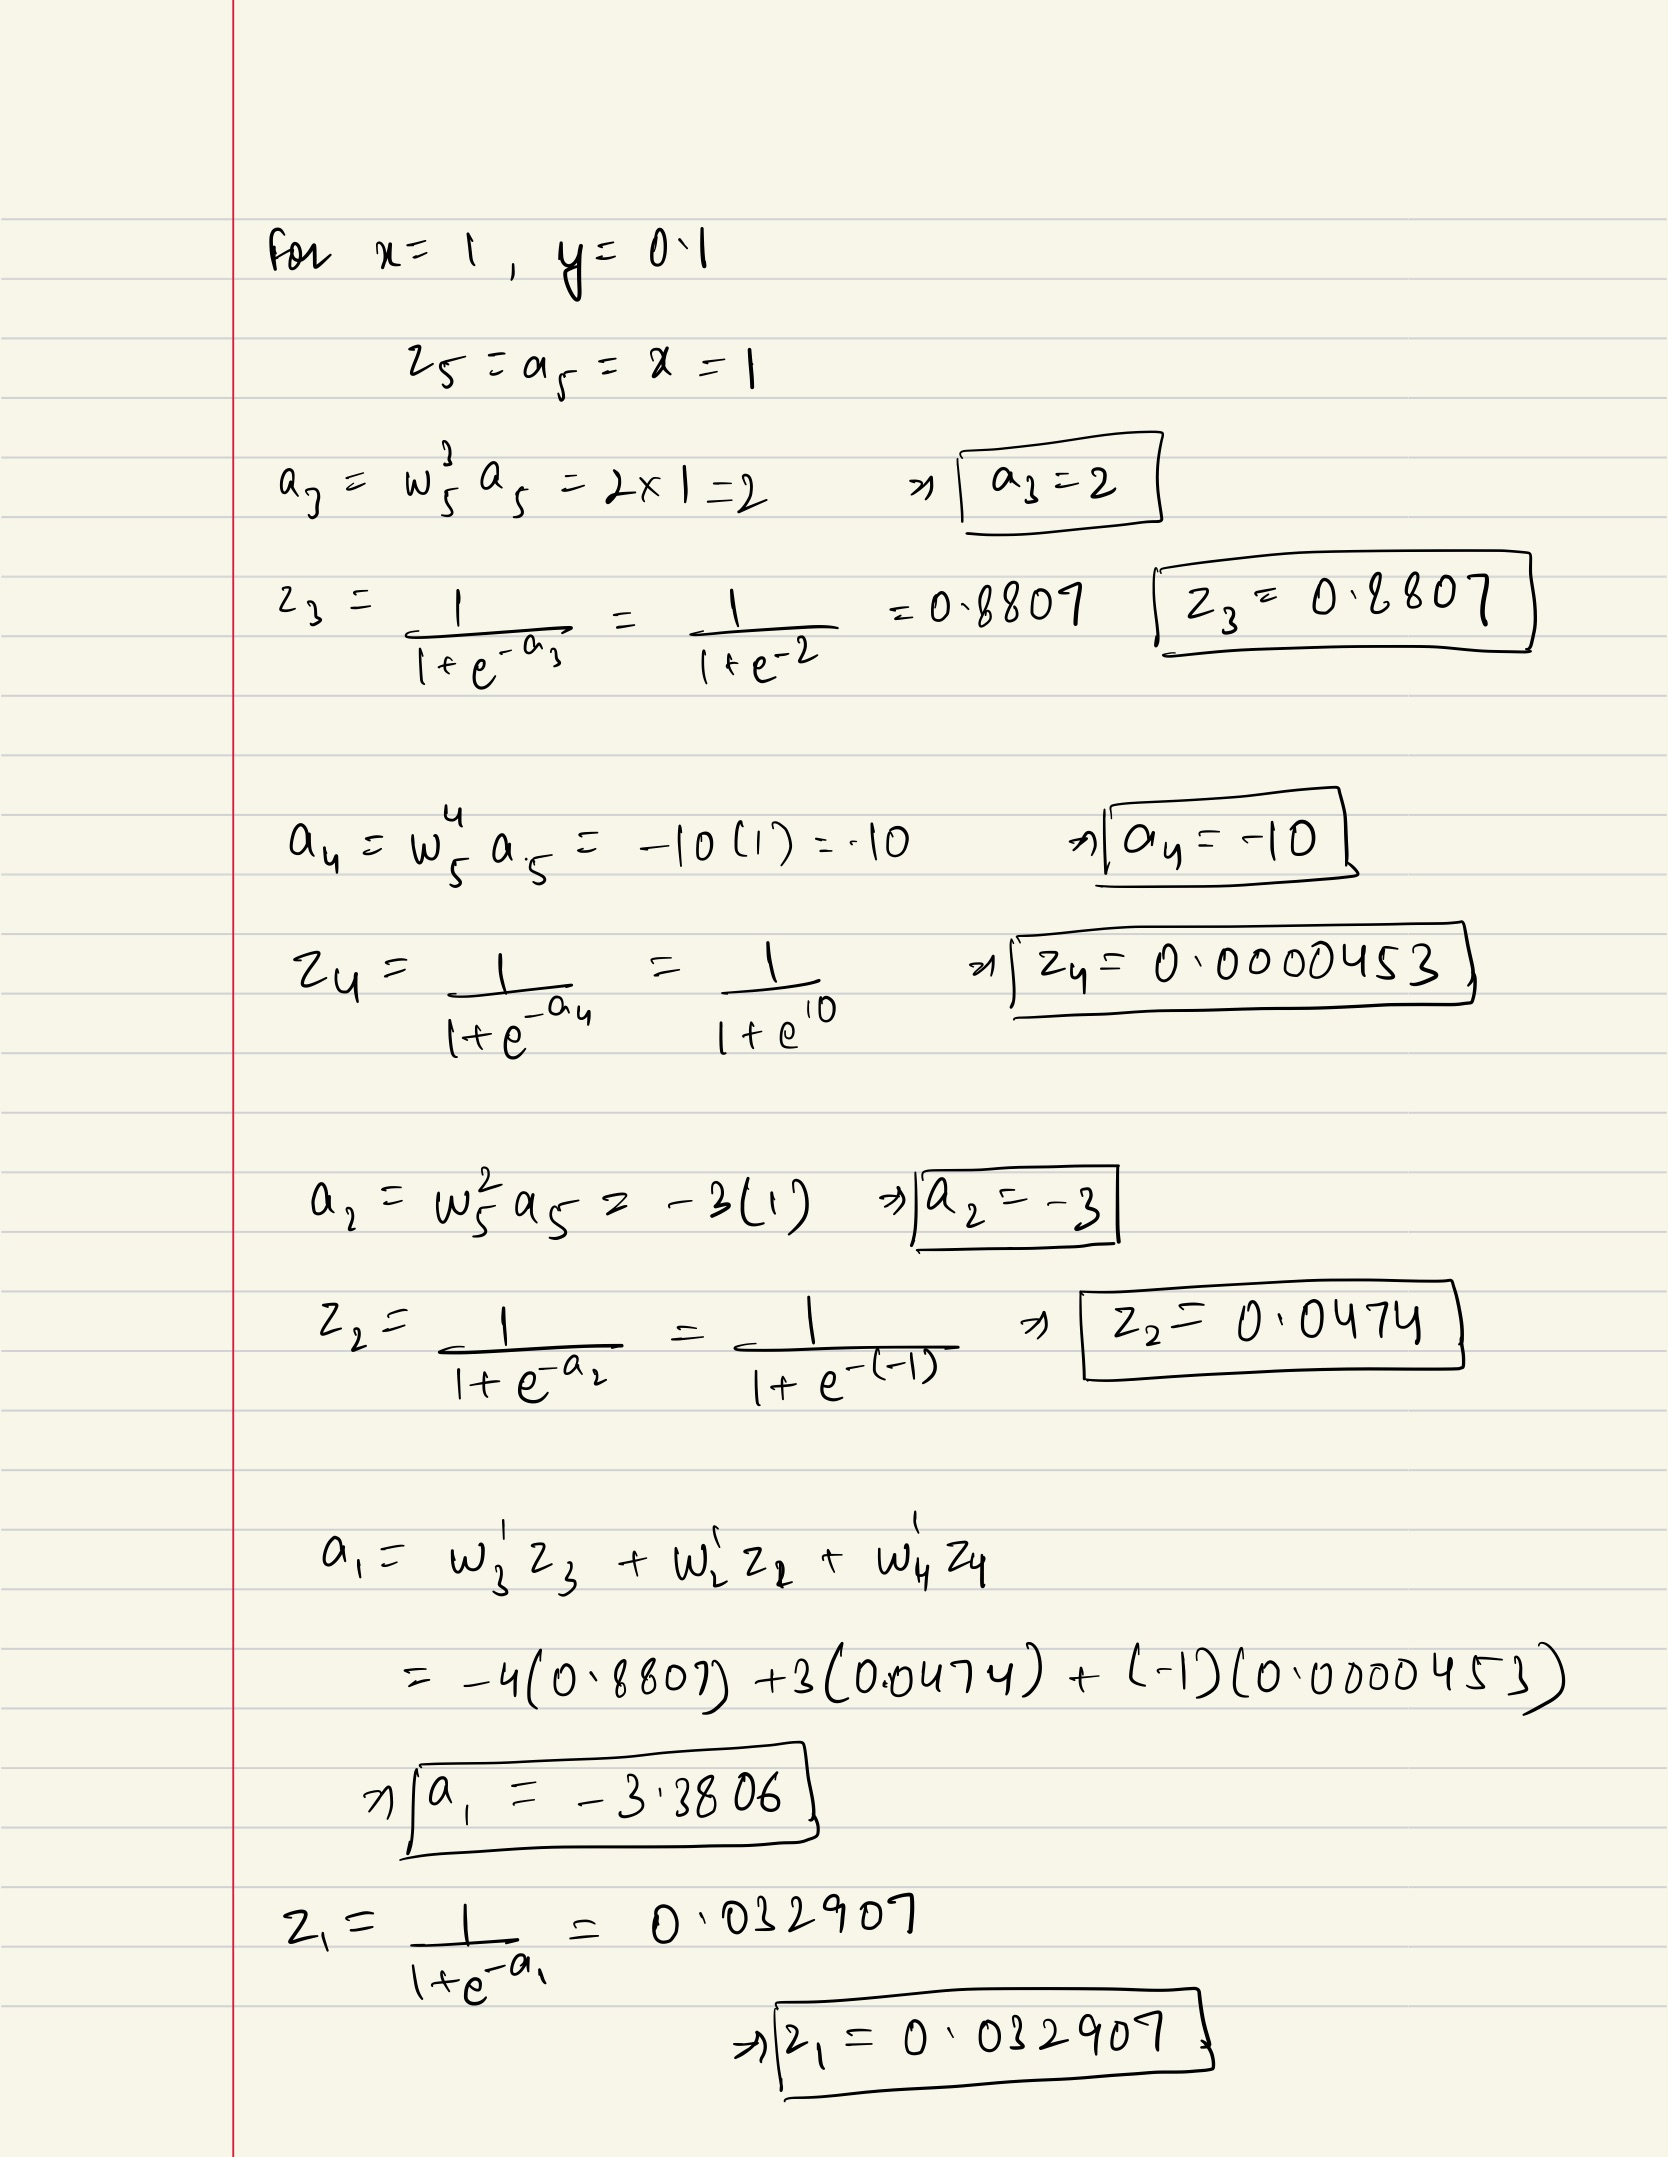

In [10]:
Image(filename='2.3_2.jpg') 

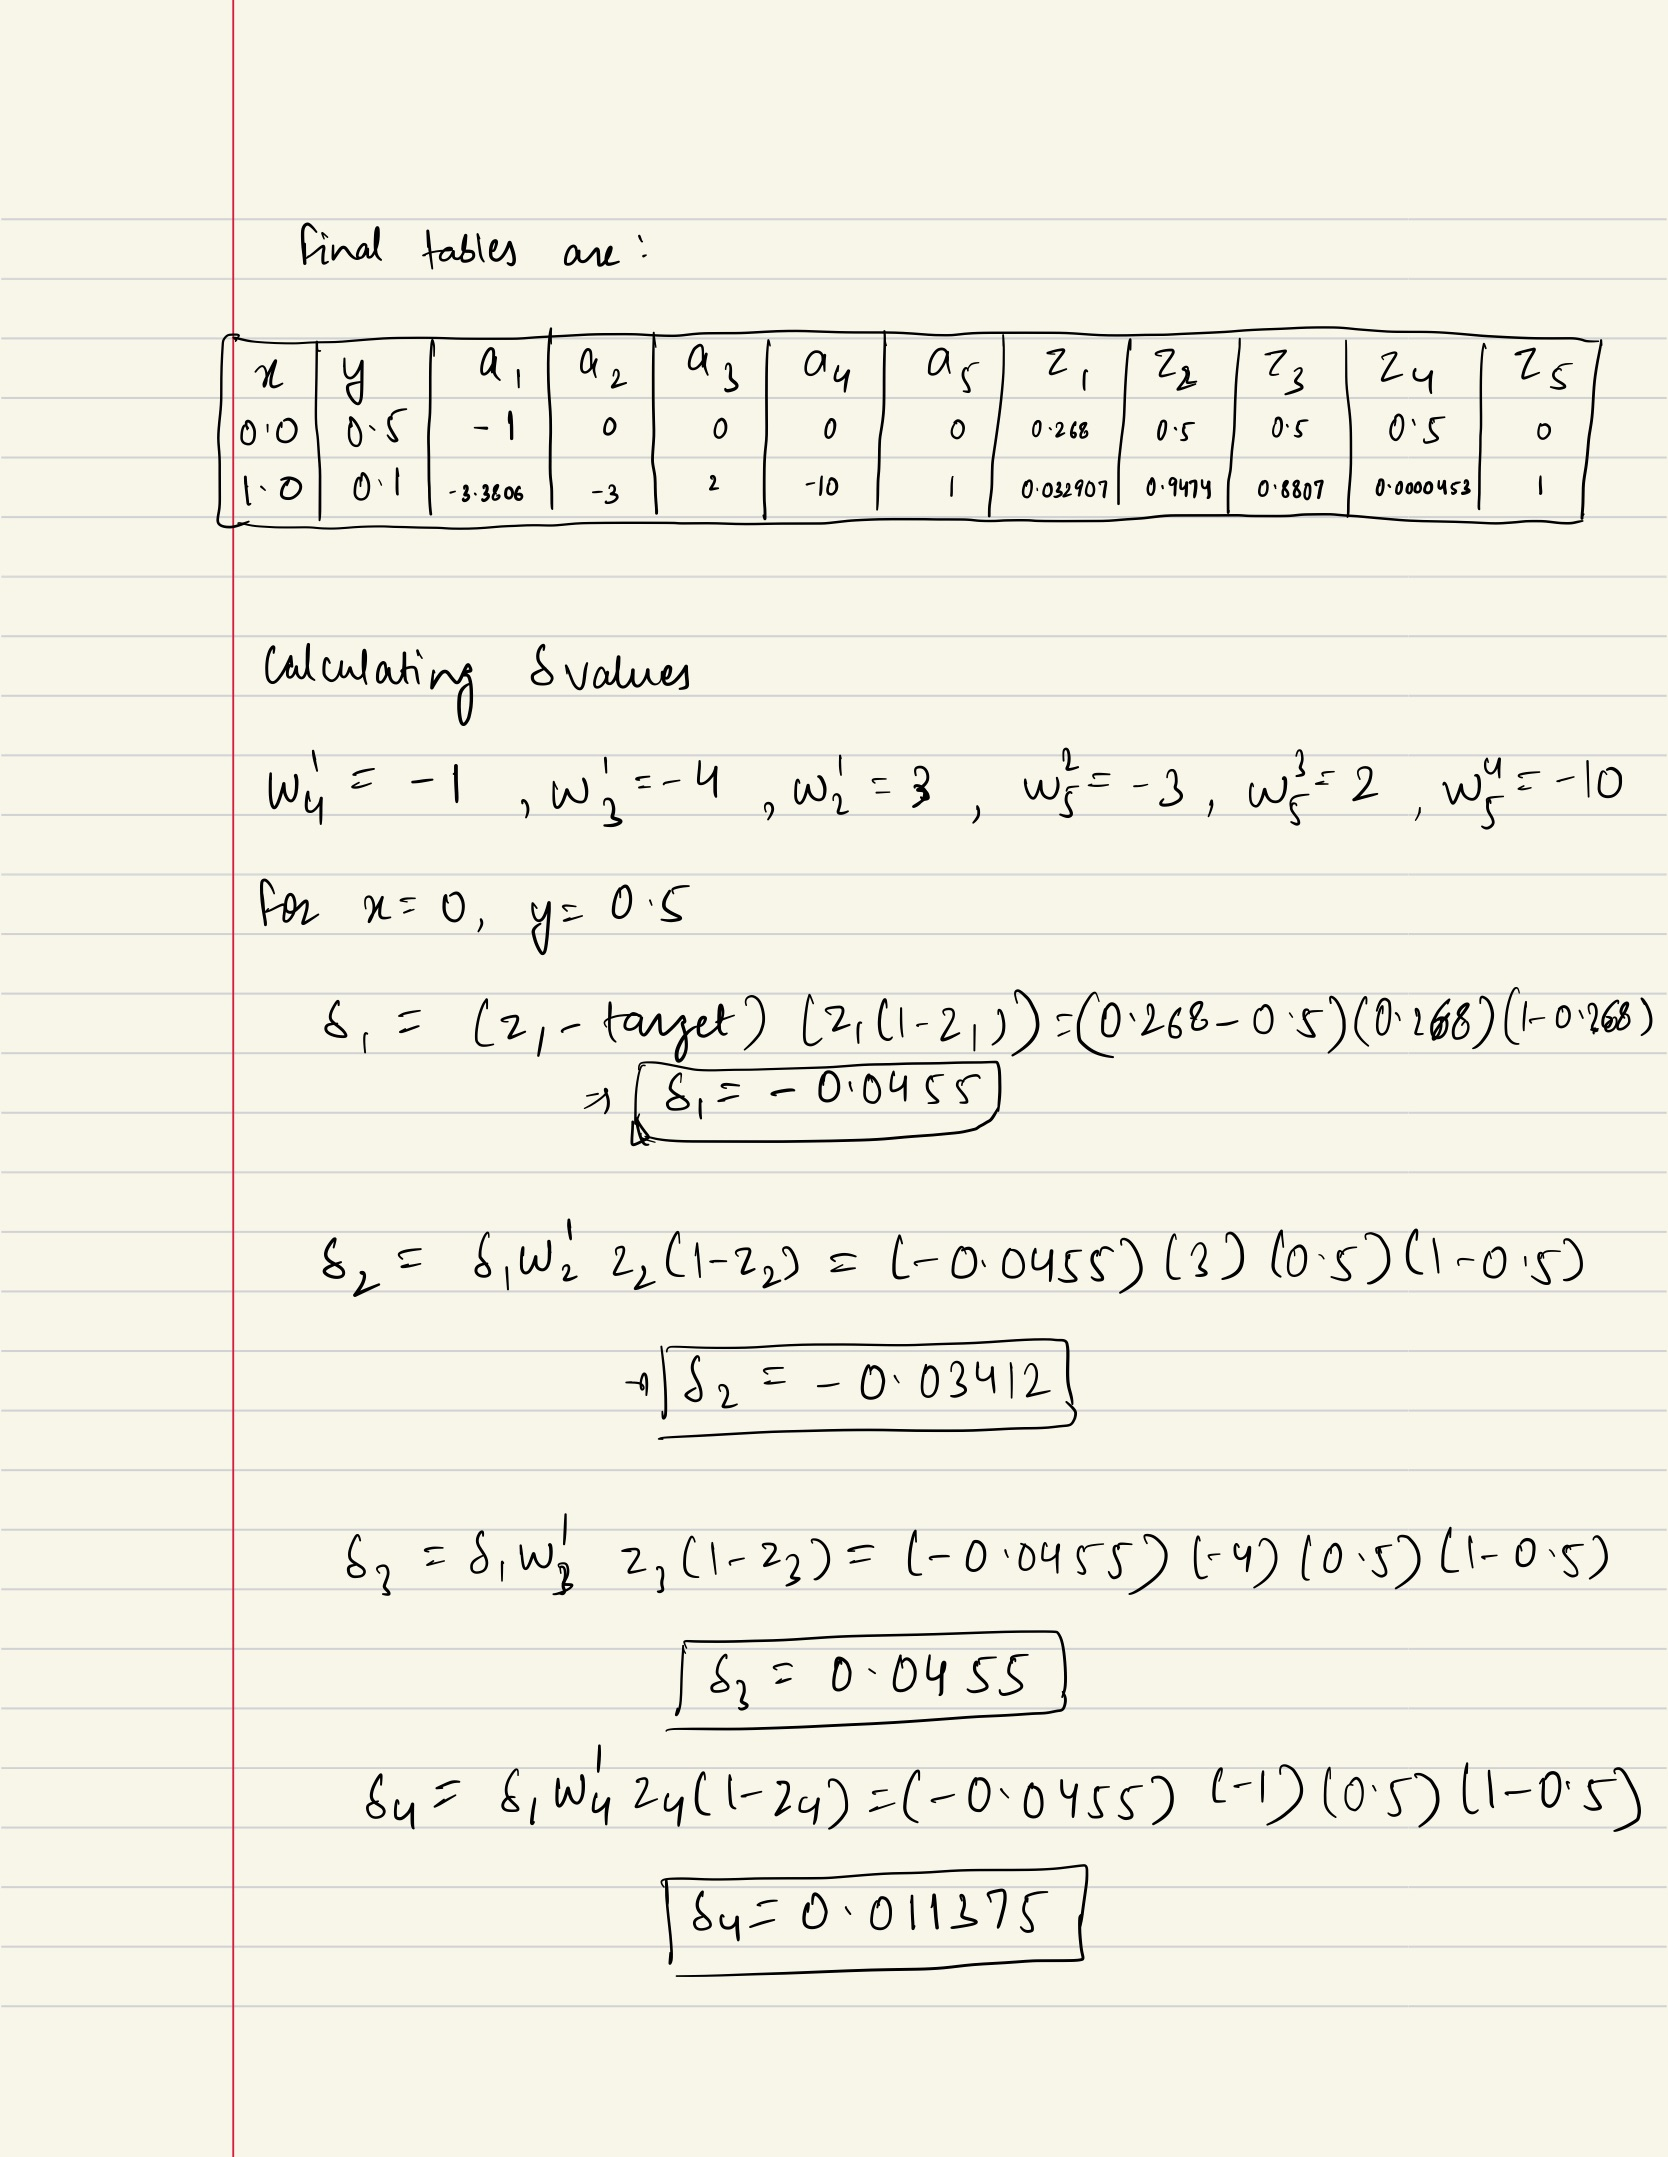

In [11]:
Image(filename='2.3_3.jpg') 

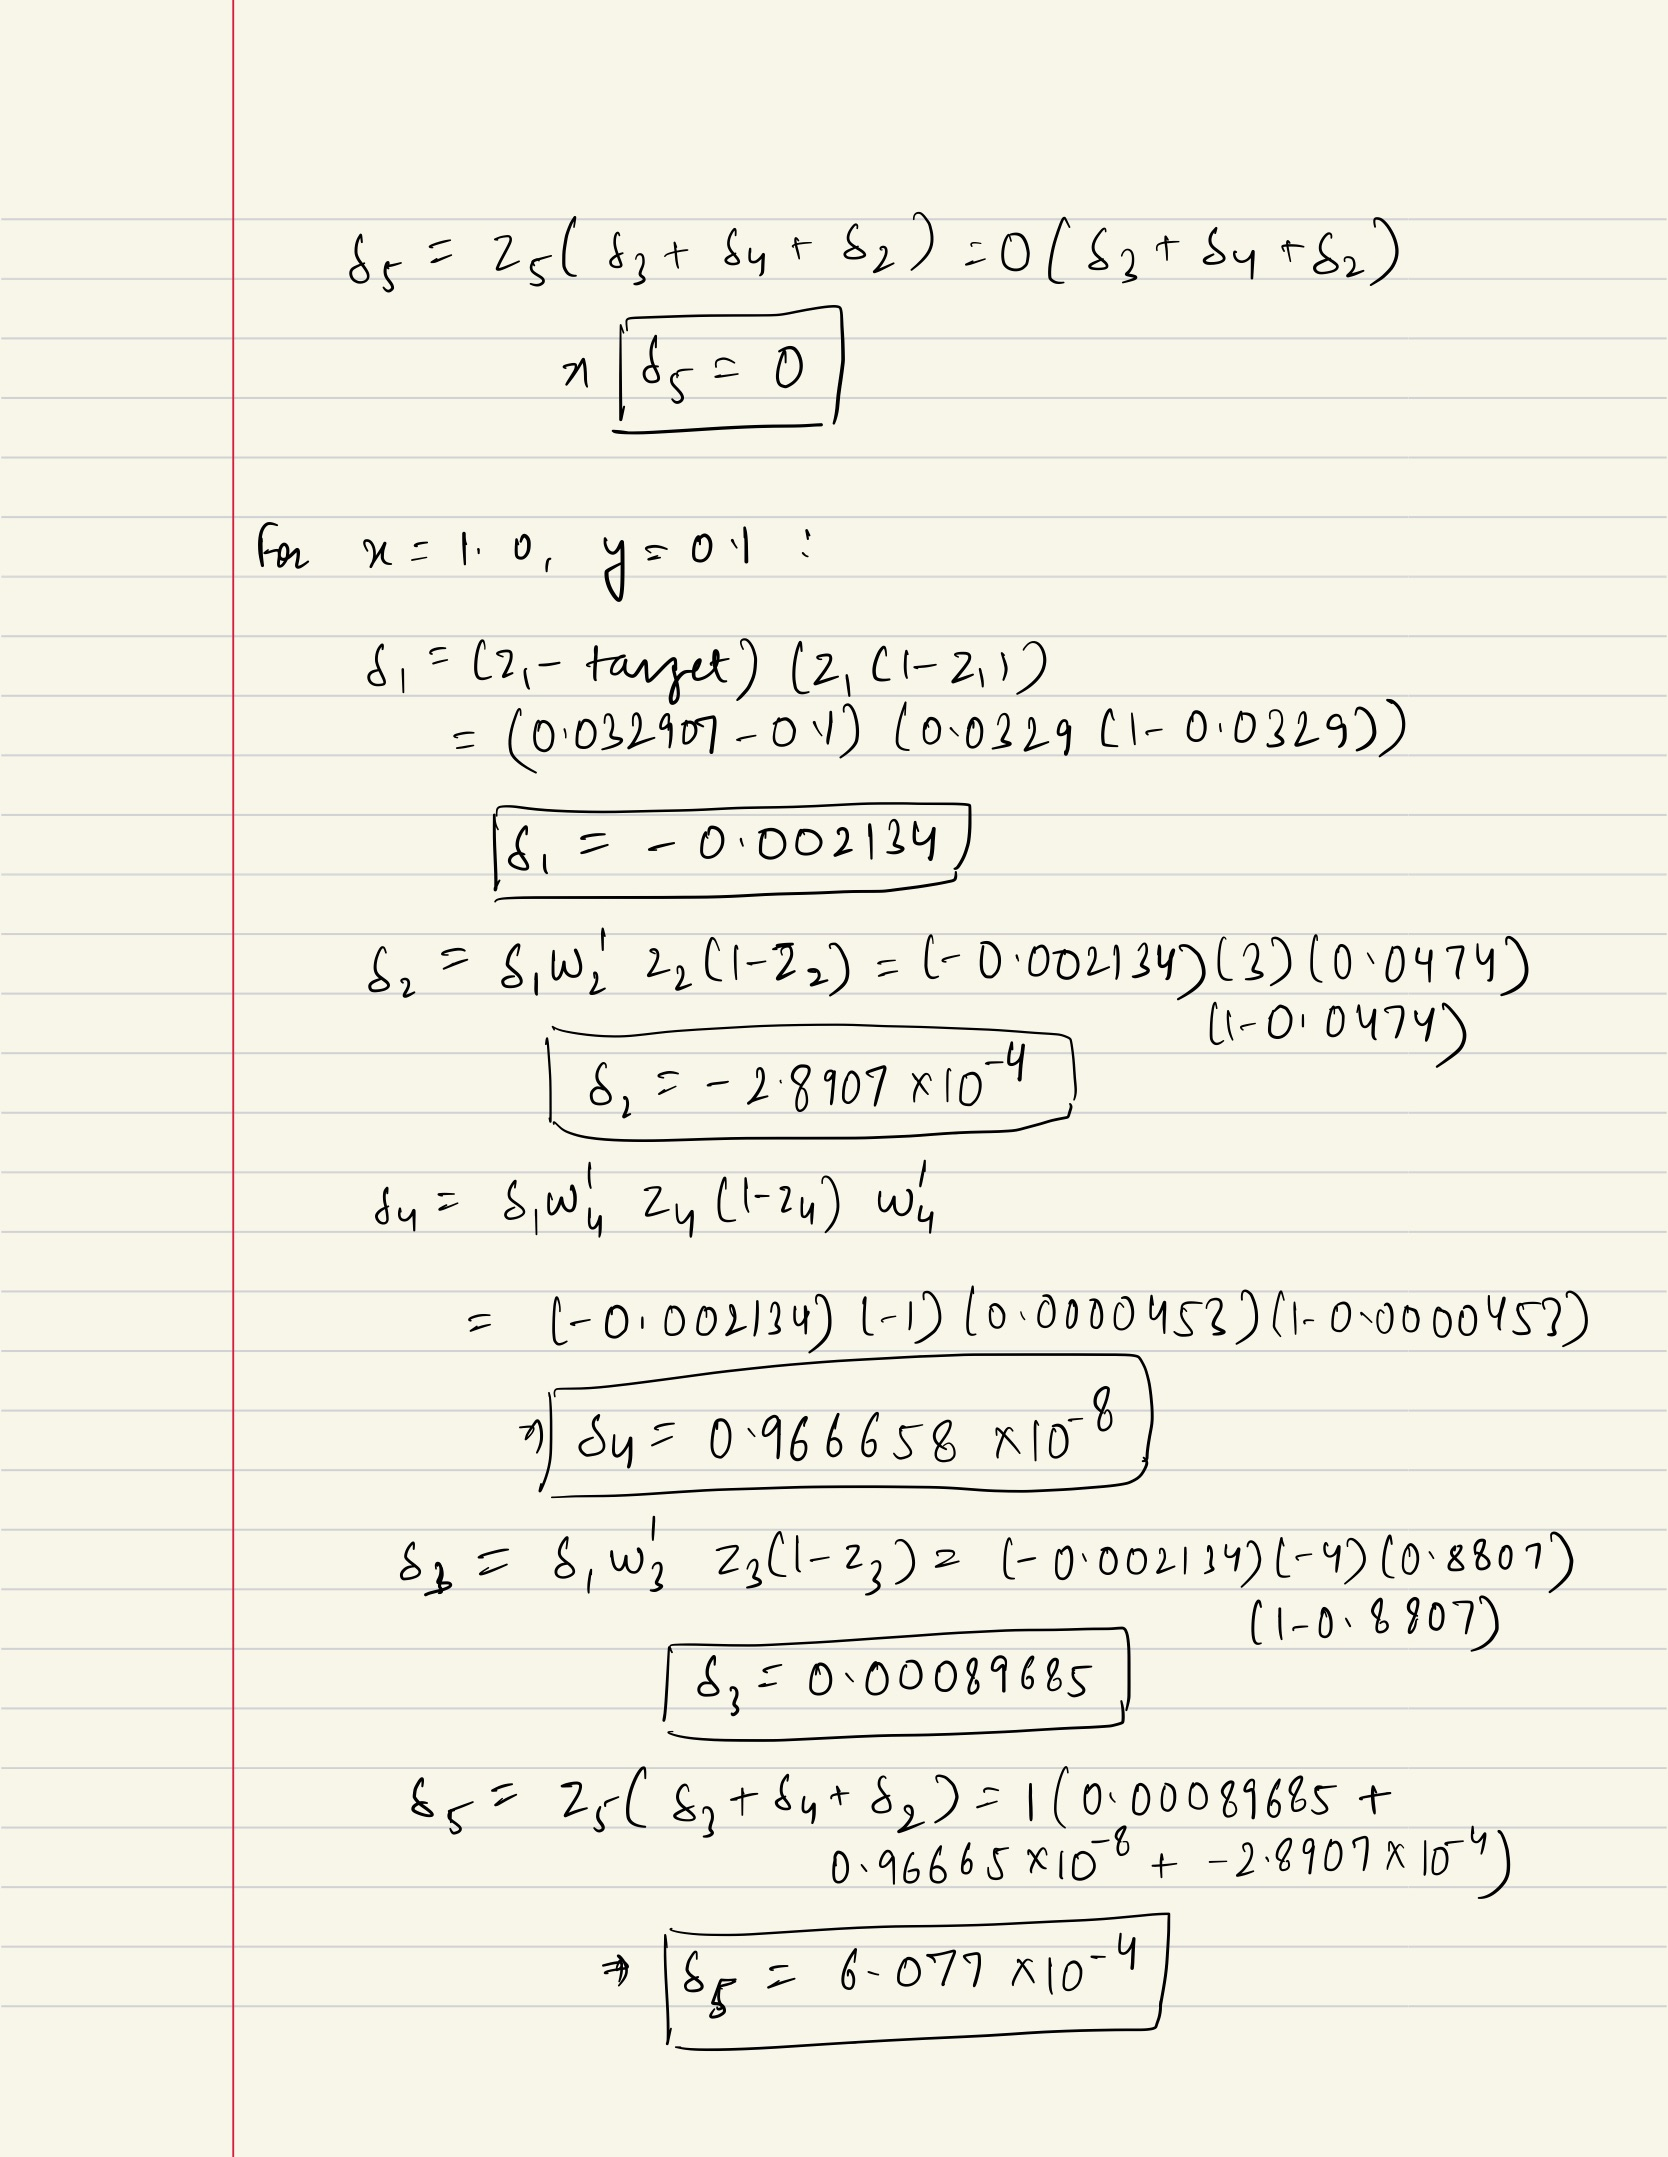

In [12]:
Image(filename='2.3_4.jpg') 

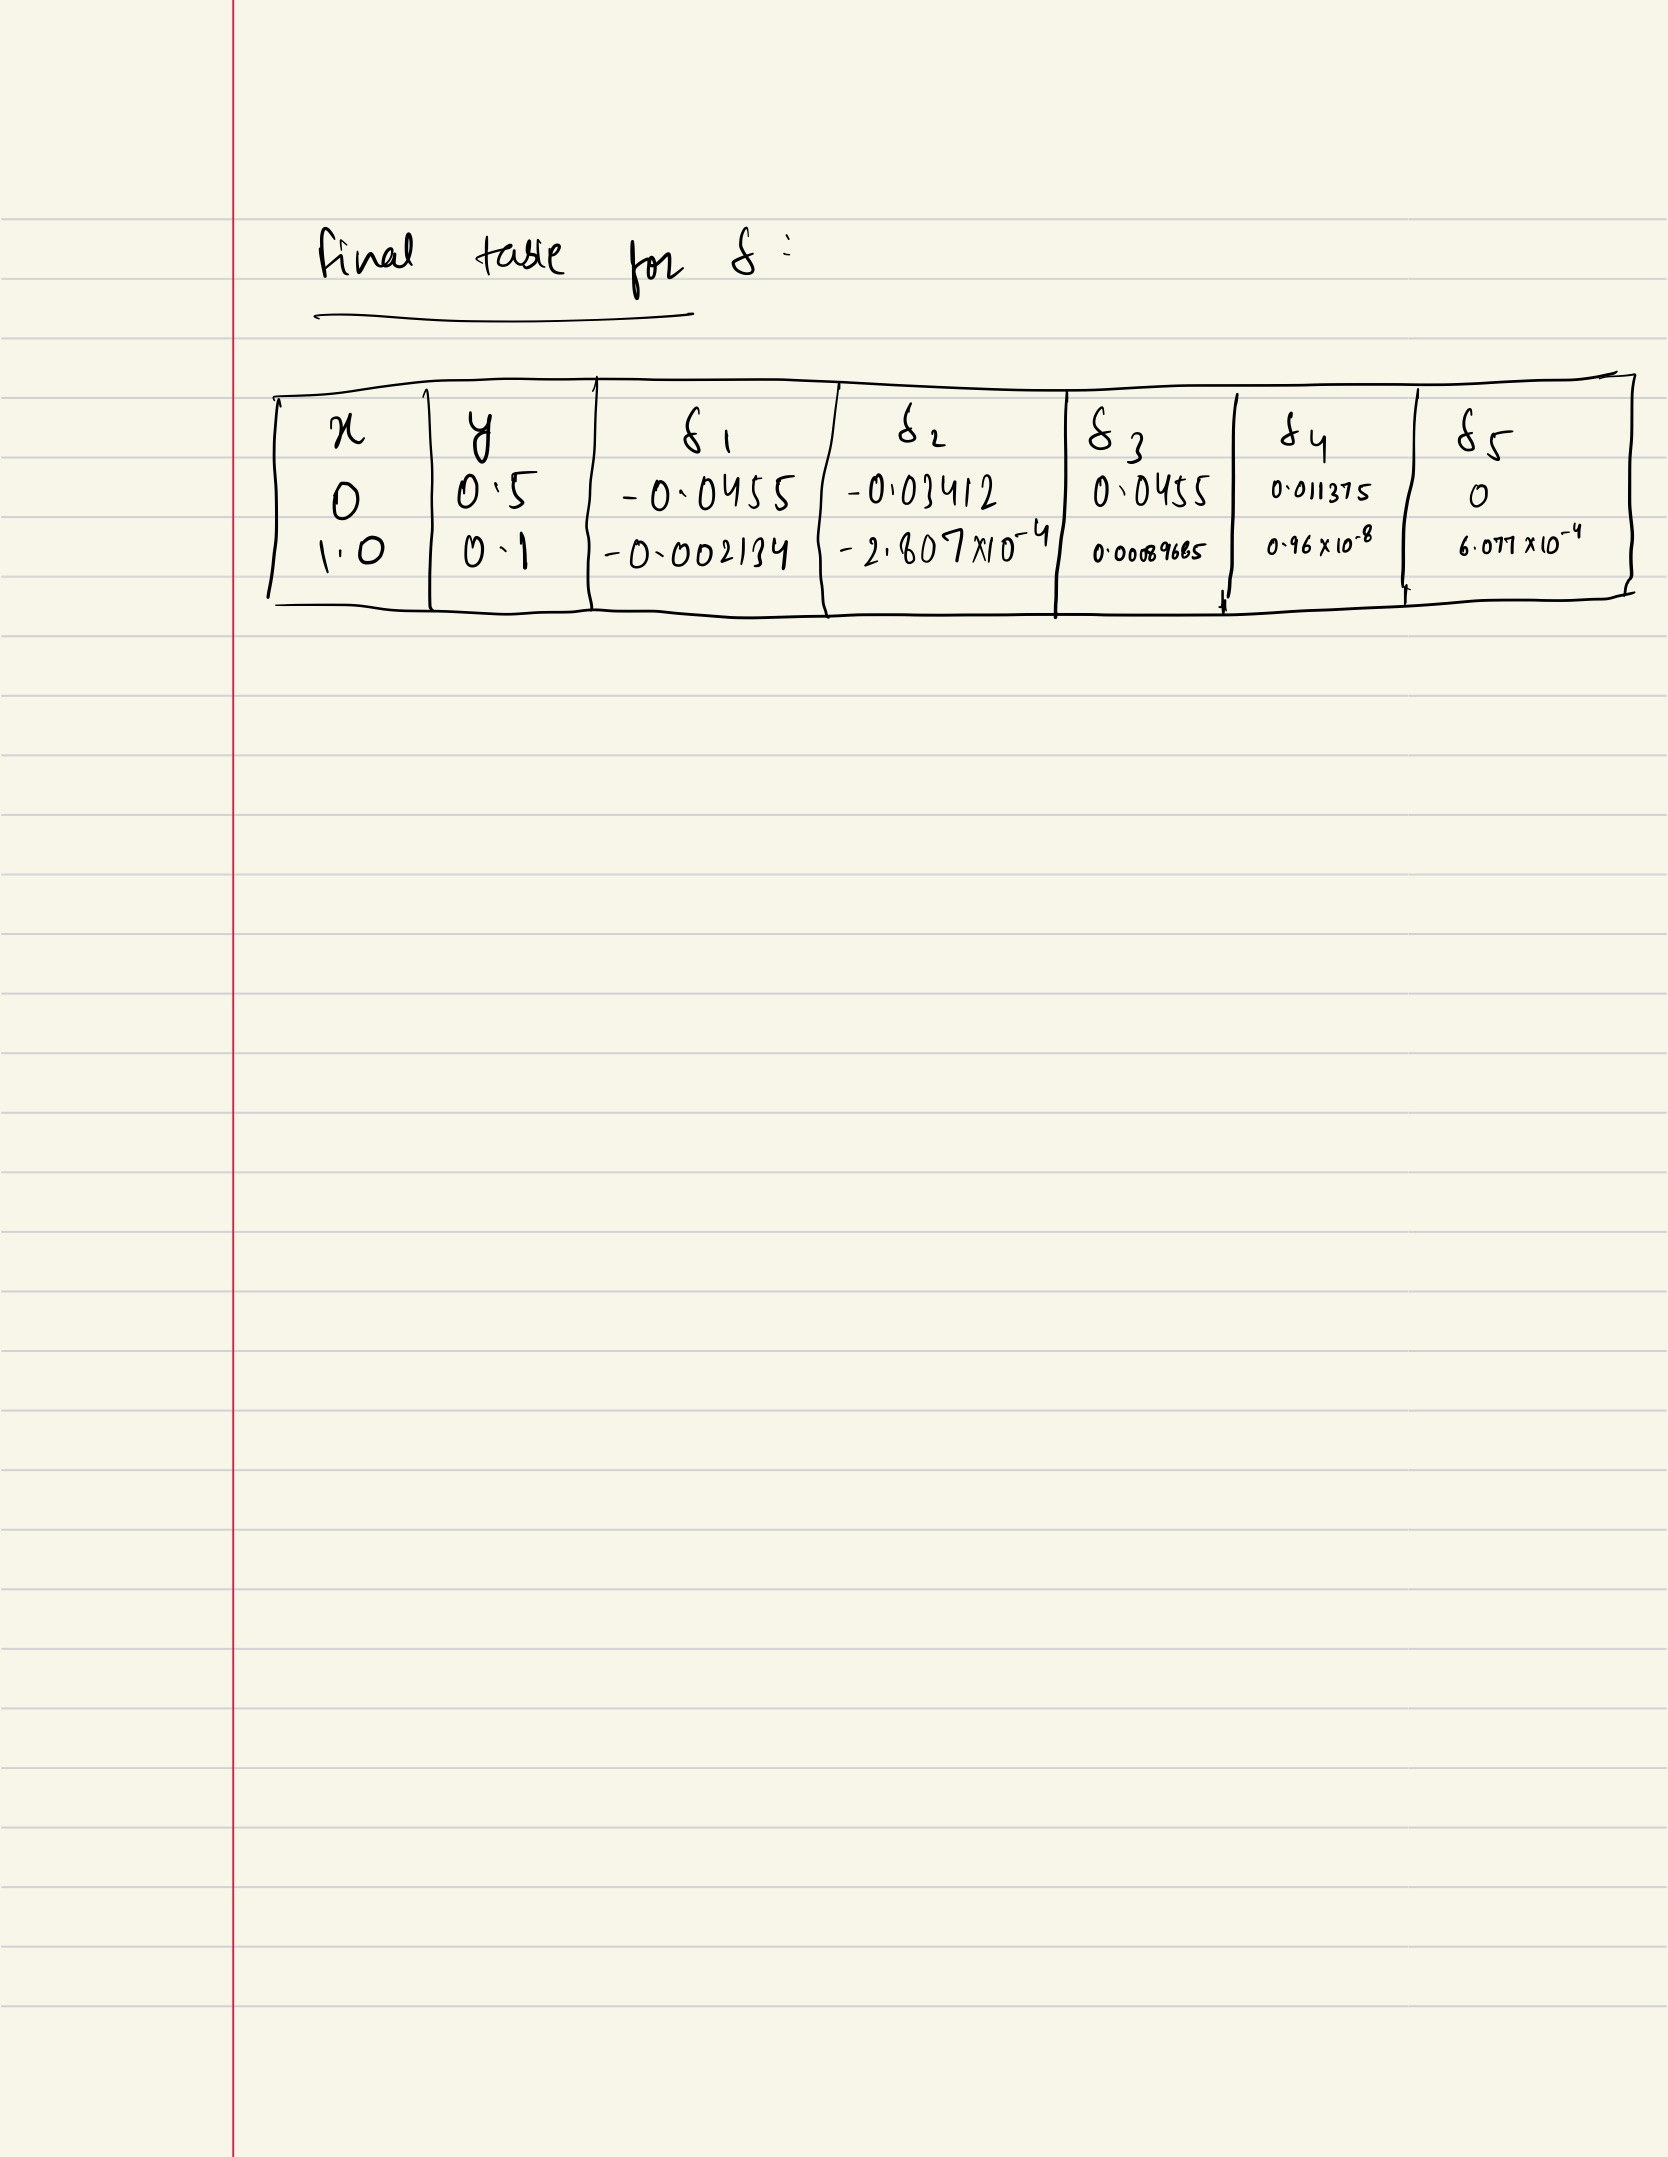

In [13]:
Image(filename='2.3_5.jpg') 

### **Question 2.4** (15 pts) ###

Implement a function to train the neural network **from scratch** using the stochastic gradient  descent **(mainly you need to implement forward_pass and backward_pass)**. Use this function to train the network with the following training samples:

\begin{array}{ c c }
 x & y  \\ 
 -3.0 & 0.7312  \\  
 -2.0 & 0.7339   \\  
 -1.5 & 0.7438 \\  
 -1.0 & 0.7832 \\  
 -0.5 & 0.8903 \\  
 0.0 & 0.9820 \\  
 0.5 & 0.8114 \\  
 1.0 & 0.5937 \\  
 1.5 & 0.5219 \\  
 2.0 & 0.5049 \\  
 3.0 & 0.5002  
\end{array}

Plot the evolution of the error and the final predictions of the trained network. Write down the weights of the trained nettwork.

Error at epoch 0 is 0.01858
Error at epoch 100 is 0.00795
Error at epoch 200 is 0.00685
Error at epoch 300 is 0.00670
Error at epoch 400 is 0.00667
Error at epoch 500 is 0.00666
Error at epoch 600 is 0.00666
Error at epoch 700 is 0.00665
Error at epoch 800 is 0.00665
Error at epoch 900 is 0.00664


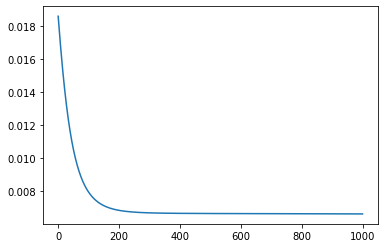

jhh
[[0.86637688 0.84611671 0.82878111 0.80415039 0.77087621 0.72960145
  0.68393988 0.63940064 0.60065372 0.56972766 0.52894417]]


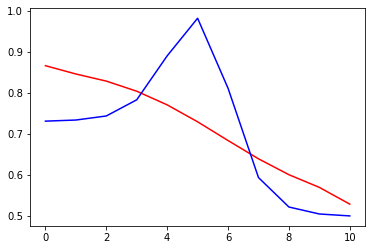

Weights of the network are: 
w13, w12, w14 [[-0.15638164  0.69934992  1.44223465]]
w35, w25, w45 [[ 0.9382966  -0.3224773  -0.98765751]]


In [14]:
## HELPER CODE##

import numpy as np 
import matplotlib.pyplot as plt

# defining the backprop for Sigmoid Function
def backprop_sigmoid(x):
  return x*(1-x)

# defining the Sigmoid Function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def forward_pass(X, weights_input_hidden, weights_hidden_output):

    # calculating hidden layer activations
    # find "hiddenLayer_activations" here

    ########################
    #### YOUR CODE HERE ####
    
    hiddenLayer_linearTransformation = np.dot(weights_input_hidden.T, X.T)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransformation)

    ########################


    # calculating the output
    # find "output" here

    ########################
    #### YOUR CODE HERE ####
    
    outputLayer_linearTransformation = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransformation)
    
    ########################

    return output, hiddenLayer_activations


def backward_pass(X, y, output, weights_hidden_output, weights_input_hidden, hiddenLayer_activations):


  # calculating rate of change of error w.r.t weight between hidden and output layer
  # find gradients for w13, w12, w14 and let's store them in "error_wrt_weights_hidden_output"

  # NOTE: "error_wrt_weights_hidden_output" will be same size as "weights_hidden_output"

  ########################
  #### YOUR CODE HERE ####

  error_wrt_output = -(y.T - output)
  
  output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
  outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

  error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
  )
  ########################


  # calculating rate of change of error w.r.t weights between input and hidden layer
  # find gradients for w35, w45, w25 and let's store them in "error_wrt_weights_input_hidden"

  # NOTE: "error_wrt_weights_input_hidden" will be same size as "weights_input_hidden"

  ########################
  #### YOUR CODE HERE ####
  
  outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
  hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
  )
  hiddenLayer_linearTransform_wrt_weights_input_hidden = X.T
  error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
  )
  
  ########################

  return error_wrt_weights_hidden_output, error_wrt_weights_input_hidden


# Train function
def train(X_train, y_train):

    # defining the model architecture
    inputLayer_neurons = 1  # number of neurons at input
    hiddenLayer_neurons = 3  # number of hidden layers neurons
    outputLayer_neurons = 1  # number of neurons at output layer

    # initializing weight
    weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
    weights_hidden_output = np.random.uniform(
        size=(hiddenLayer_neurons, outputLayer_neurons)
    )


    # defining the parameters
    lr = 0.1        # CAN BE CHANGED IF REQUIRED
    epochs = 1000   # CAN BE CHANGED IF REQUIRED

    losses =  []

    for ep in range(epochs):

      output_, hiddenLayer_activations = forward_pass(X_train, weights_input_hidden, weights_hidden_output)

      ## Backward Propagation
      # calculating error
      error = np.square(output_ - y_train.T) / 2

      error_wrt_weights_hidden_output, error_wrt_weights_input_hidden = backward_pass(X_train, y_train, 
                                                                                      output_, 
                                                                                      weights_hidden_output, 
                                                                                      weights_input_hidden, 
                                                                                      hiddenLayer_activations)

      # updating the weights
      weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
      weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

      # print error at every 100th epoch
      epoch_loss = np.average(error)
      if ep % 100 == 0:
          print(f"Error at epoch {ep} is {epoch_loss:.5f}")

      # appending the error of each epoch
      losses.append(epoch_loss)

    plt.plot(losses)
    plt.show()

    final_pred, _ = forward_pass(X_train, weights_input_hidden, weights_hidden_output)
    
    print("jhh")
    print(final_pred)

    plt.plot(final_pred.T, c='r')
    plt.plot(y_train, c='b')
    plt.show()

    print("Weights of the network are: ")
    print("w13, w12, w14", weights_hidden_output.T)
    print("w35, w25, w45", weights_input_hidden)


## HELPER CODE ##

# defining training data
X_train = np.zeros((11, 1)).astype(np.float32)
y_train = np.zeros((11, 1)).astype(np.float32)

X_train[0] = -3
X_train[1] = -2
X_train[2] = -1.5
X_train[3] = -1.0
X_train[4] = -0.5
X_train[5] = 0.0
X_train[6] = 0.5
X_train[7] = 1.0
X_train[8] = 1.5
X_train[9] = 2.0
X_train[10] = 3.0


y_train[0] = 0.7312
y_train[1] = 0.7339
y_train[2] = 0.7438
y_train[3] = 0.7832
y_train[4] = 0.8903
y_train[5] = 0.9820
y_train[6] = 0.8114
y_train[7] = 0.5937
y_train[8] = 0.5219
y_train[9] = 0.5049
y_train[10] = 0.5002


train(X_train, y_train)